# **PicoScope**: analysis of scattering profile

<span style="color:gold">
    <font size="6">
        <b>gold</b>
    </font>
</span>

## Preliminary operations

### Paths

In [1]:
USER_PATH = "/home/rocco/University/APL/Lab/"
DATA_PATH = USER_PATH + "data/gold"
SAVE_PATH = "../../plots/data/picoscope/"

### Flags

In [9]:
UNZIP_DATA    = False
WAVE2NUMPY    = True
PLOT_WAVE     = True
PLOT_MAV_WAVE = True
REJECT_3SIGMA = False
SAVE_DATA     = True
VERBOSE       = True

### Load packages

In [3]:
import os
import sys
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import bokeh.palettes as palette

### Settings

In [4]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=16)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('figure', titlesize=18)   # fontsize of the figure title

### Constants

In [13]:
PATIENCE = 1000
MIN_MV   = 2400
MAX_MV   = 3300

### Functions

In [10]:
def moving_average(x, M):
    return np.convolve(x, np.ones(M), 'valid') / M

## Convert waveform files to numpy array and store

### Unzip all data archives and get number of events

In [5]:
if UNZIP_DATA:
    os.chdir(DATA_PATH)
    for d in os.listdir("."):
        os.chdir(d)
        
        if VERBOSE:
            print(d)

        if not os.path.exists("data"):
            os.system("unzip data.zip -d data")
        os.chdir("../")

17_2_DC
13_1_SC
27_3_DC
73_1_SC
9_1_SC
25_1_SC
3_1_SC
21_1_SC
39_1_SC
68_1_SC
7_2_DC
41_1_SC
27_1_DC
19_1_SC
83_1_SC
43_1_SC
23_1_SC
55_1_SC
17_1_SC
27_4_DC
15_1_SC
7_1_DC
63_1_SC
59_1_SC
31_1_SC
35_1_SC
2_1_DC
11_1_SC
53_1_SC
93_1_SC
7_1_SC
27_1_SC
83_2_SC
47_1_SC
5_1_SC
17_3_DC
29_1_SC
17_1_DC
45_1_SC
57_1_SC
83_3_SC
73_2_SC
49_1_SC
27_2_DC
37_1_SC
51_1_SC
61_1_SC
33_1_SC


### Convert to numpy array

In [8]:
if WAVE2NUMPY:
    os.chdir(DATA_PATH)
    for d in os.listdir("."):
        os.chdir(d)
        
        if VERBOSE:
            print("Processing:", d)

        if not os.path.exists(d+".npy"):
            N = len(os.listdir("./data"))
            M = 5000

            data = np.zeros((N,M),dtype=np.int16)
            for f,i in zip(os.listdir("./data"), range(N)):
                if (i % PATIENCE == 0) and VERBOSE:
                    sys.stdout.write("\r    Completeness : "+str(round(i/N*100,1))+"%")
                
                data[i,:] = np.loadtxt("./data/" + f)
            np.save(d+".npy", data)
            os.system("rm -rf ./data")
        
        if VERBOSE:
            sys.stdout.write("\n")

        os.chdir("../")

Processing: 17_2_DC
    Completeness : 0.0%
Processing: 13_1_SC
    Completeness : 0.0%
Processing: 27_3_DC
    Completeness : 0.0%
Processing: 73_1_SC
    Completeness : 0.0%
Processing: 9_1_SC
    Completeness : 0.0%
Processing: 25_1_SC
    Completeness : 97.1%
Processing: 3_1_SC
    Completeness : 0.0%
Processing: 21_1_SC
    Completeness : 96.2%
Processing: 39_1_SC
    Completeness : 97.7%
Processing: 68_1_SC
    Completeness : 0.0%
Processing: 7_2_DC
    Completeness : 0.0%
Processing: 41_1_SC
    Completeness : 97.9%
Processing: 27_1_DC
    Completeness : 0.0%
Processing: 19_1_SC
    Completeness : 98.9%
Processing: 83_1_SC
    Completeness : 0.0%
Processing: 43_1_SC
    Completeness : 99.6%
Processing: 23_1_SC
    Completeness : 97.5%
Processing: 55_1_SC
    Completeness : 0.0%
Processing: 17_1_SC
    Completeness : 91.0%
Processing: 27_4_DC
    Completeness : 0.0%
Processing: 15_1_SC
    Completeness : 0.0%
Processing: 7_1_DC
    Completeness : 0.0%
Processing: 63_1_SC
    Comp

## Analysis

In [11]:
M  = 20    # moving average (MAV) filter M
SC = 33    # picoscoper center in steps

### Collect data angle

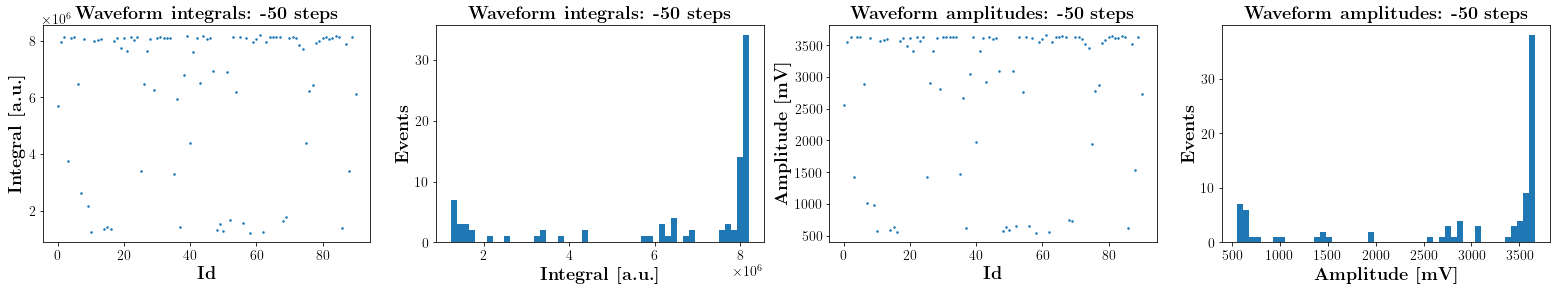

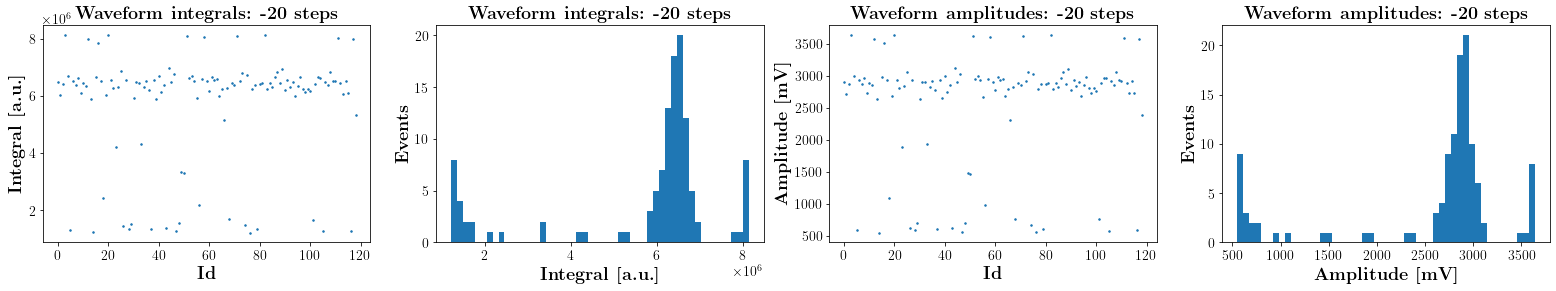

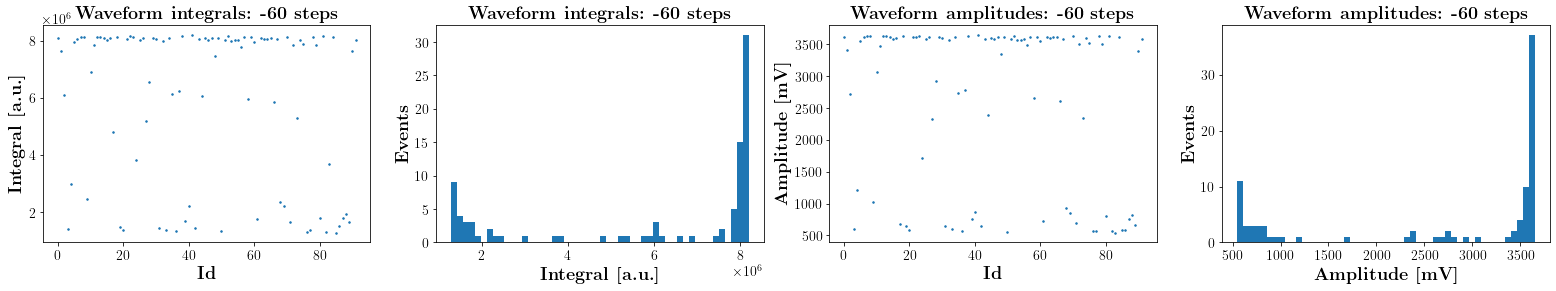

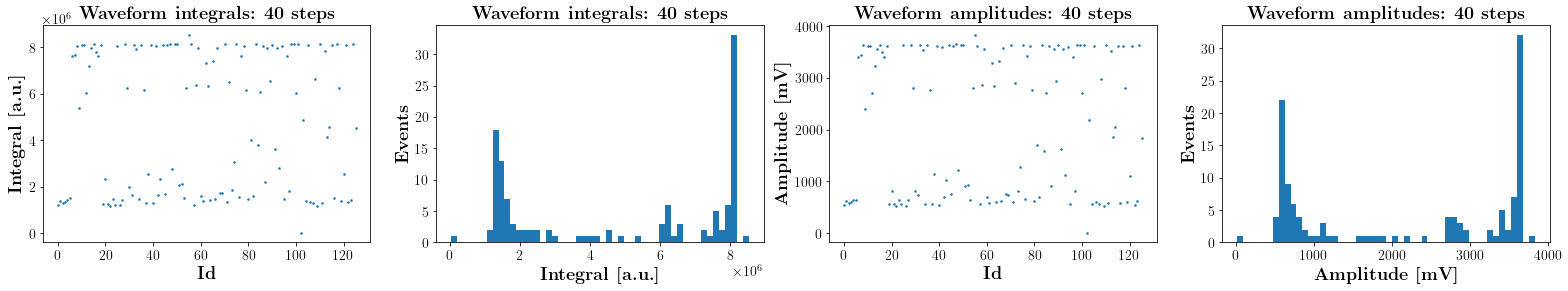

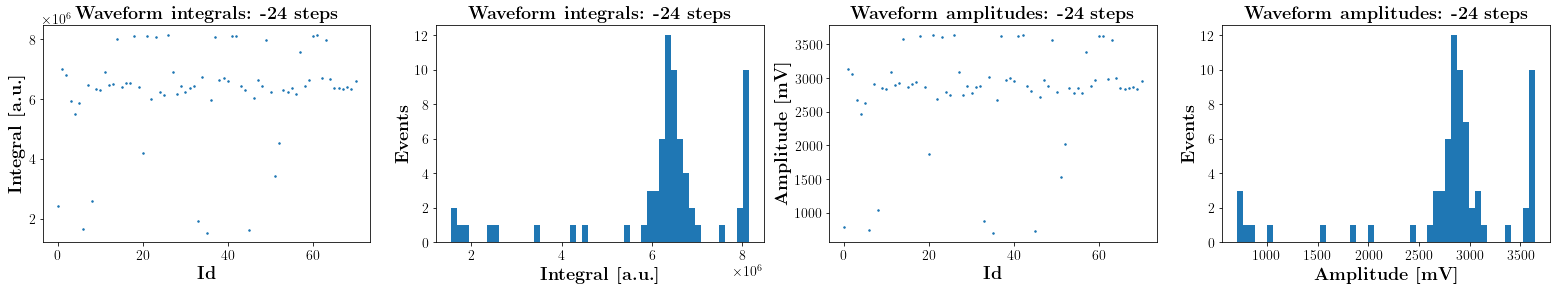

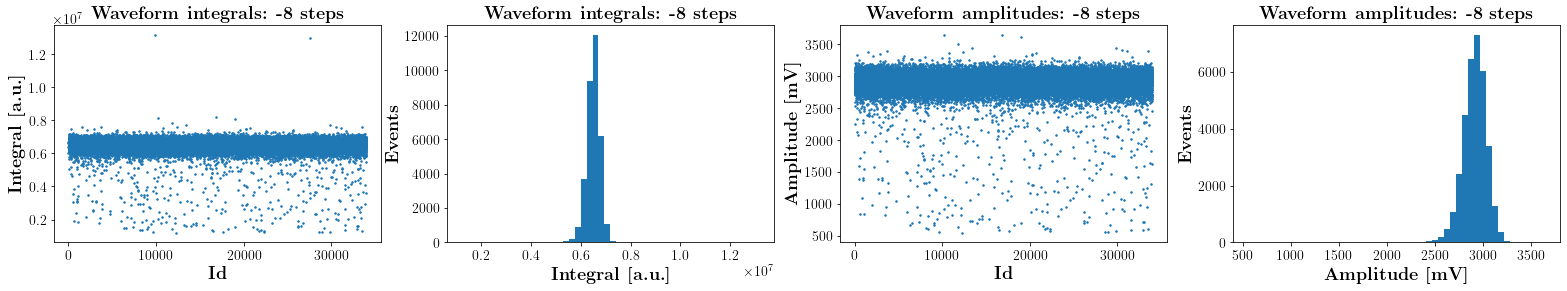

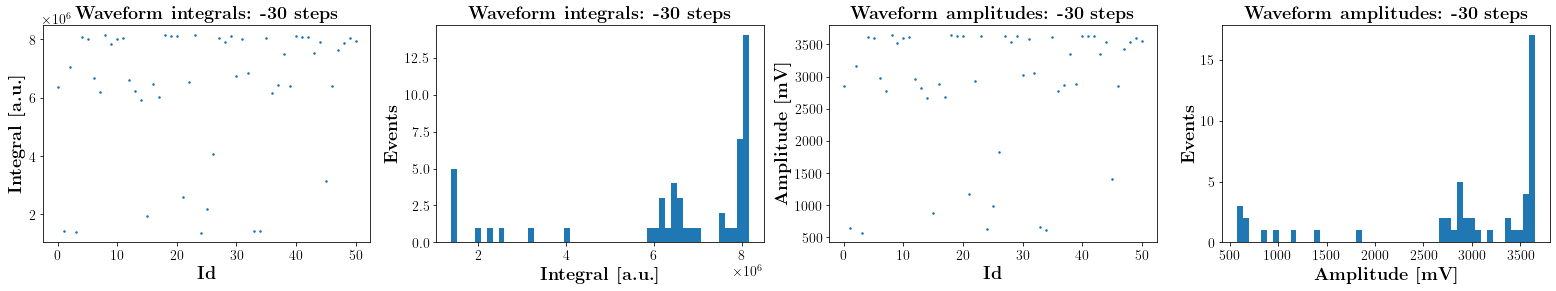

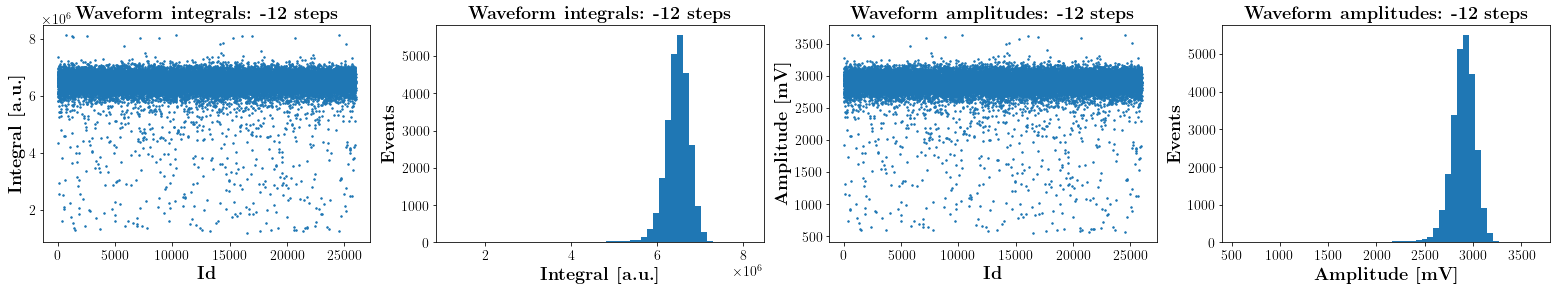

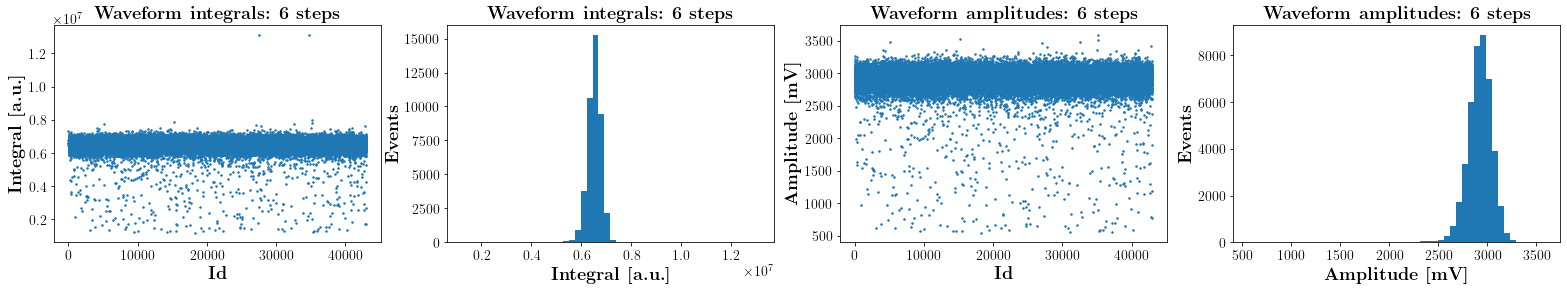

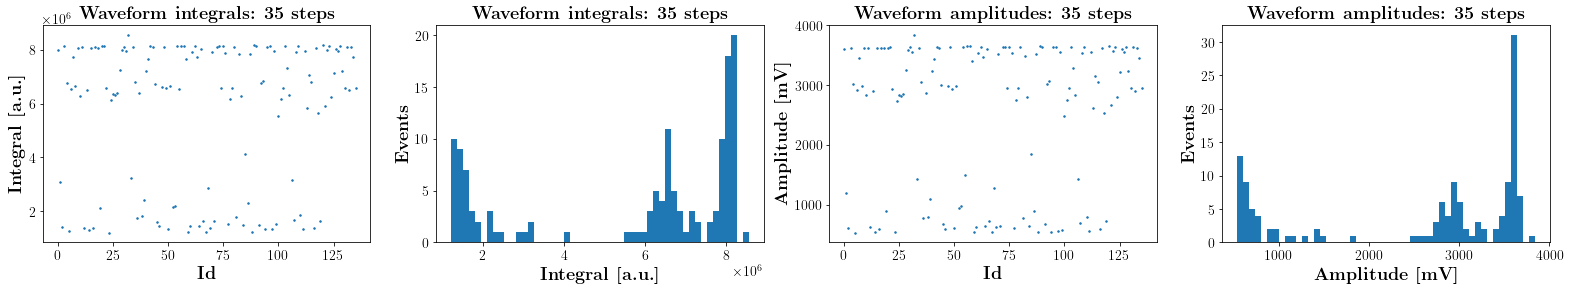

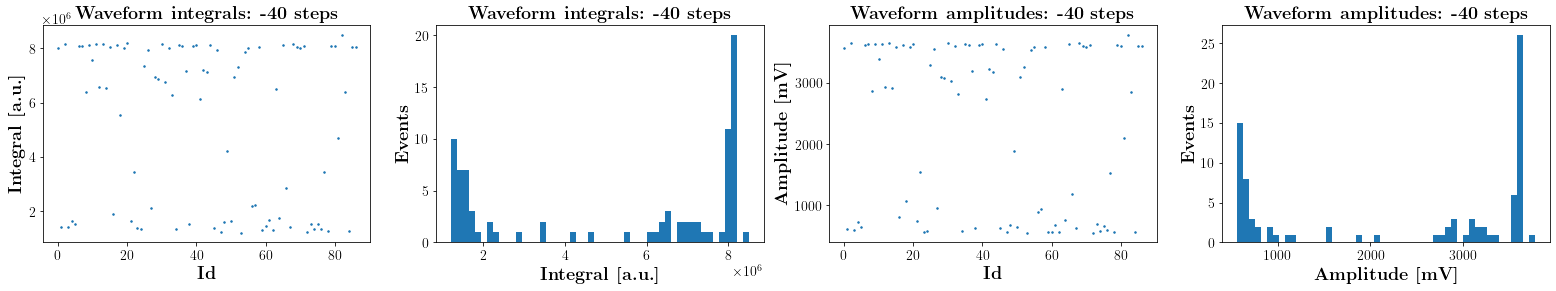

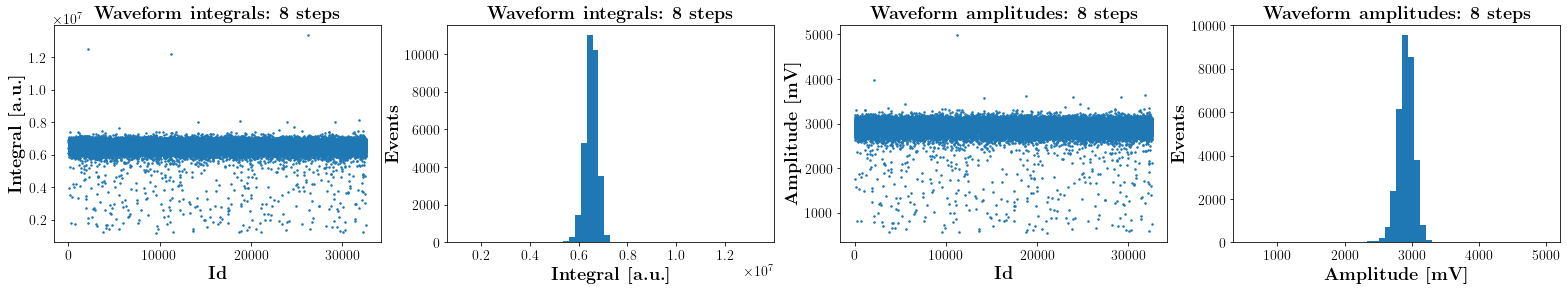

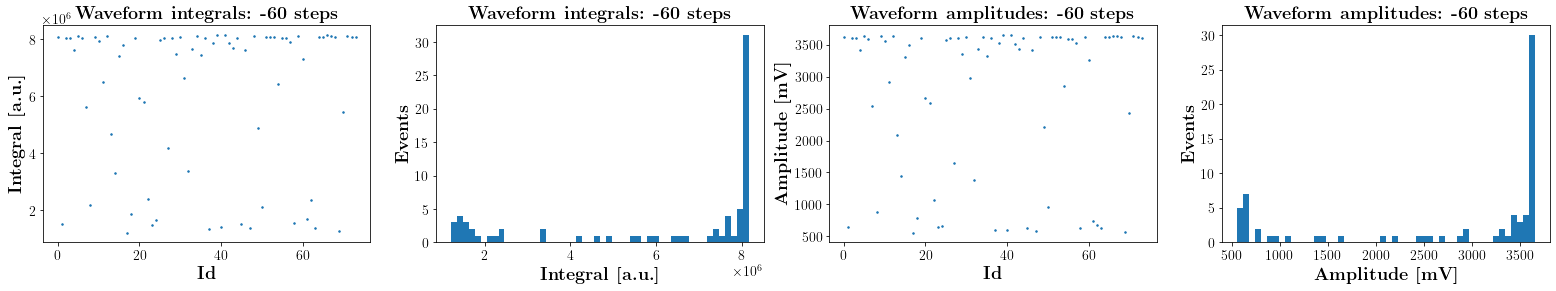

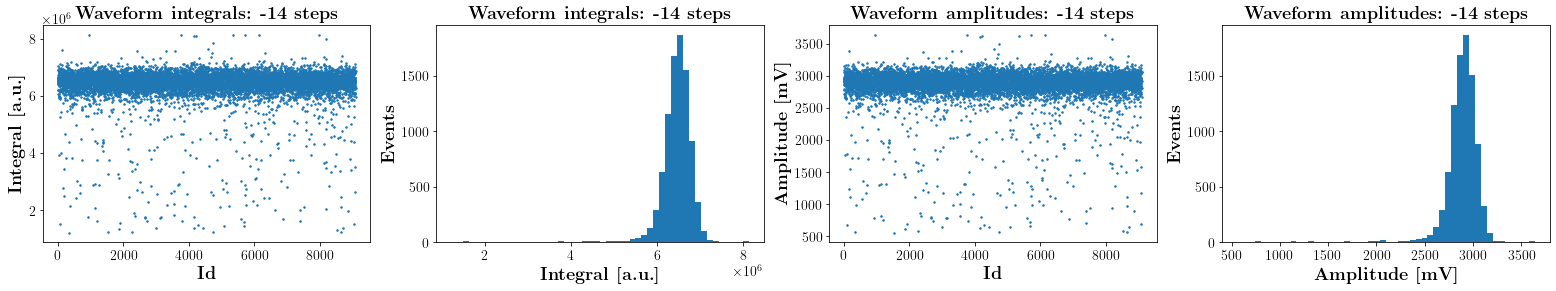

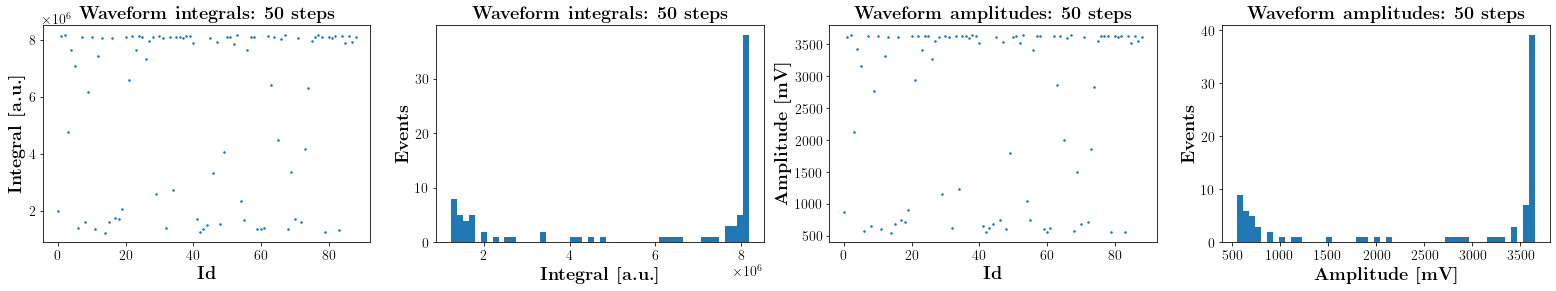

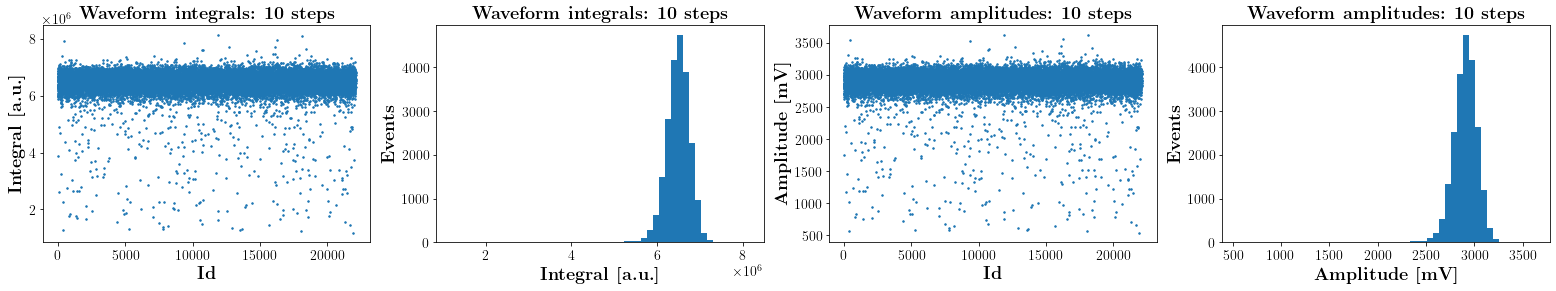

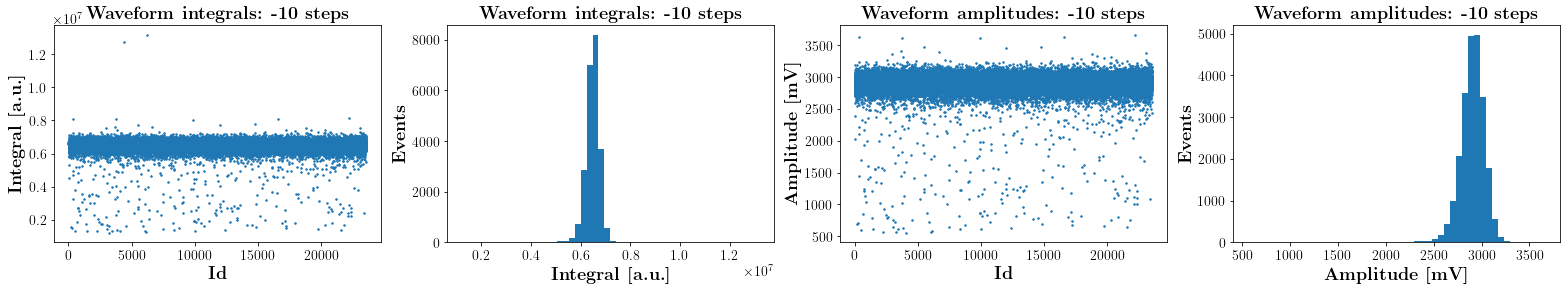

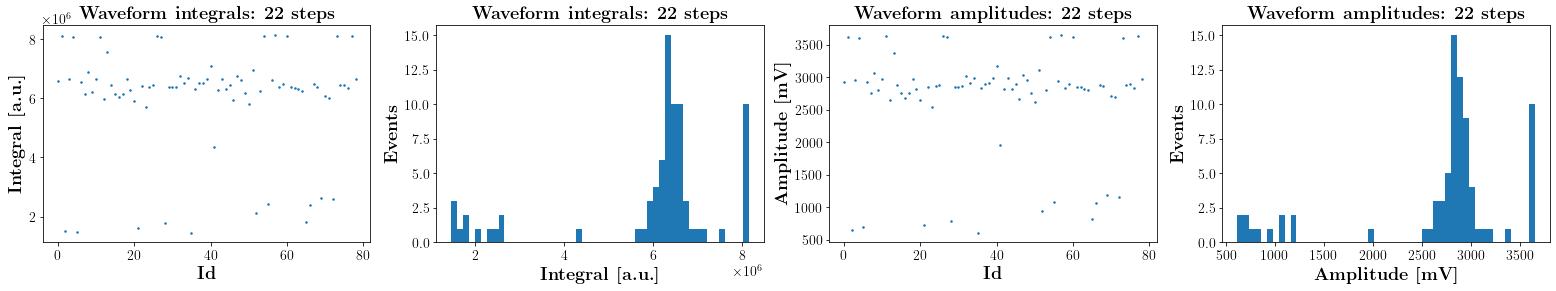

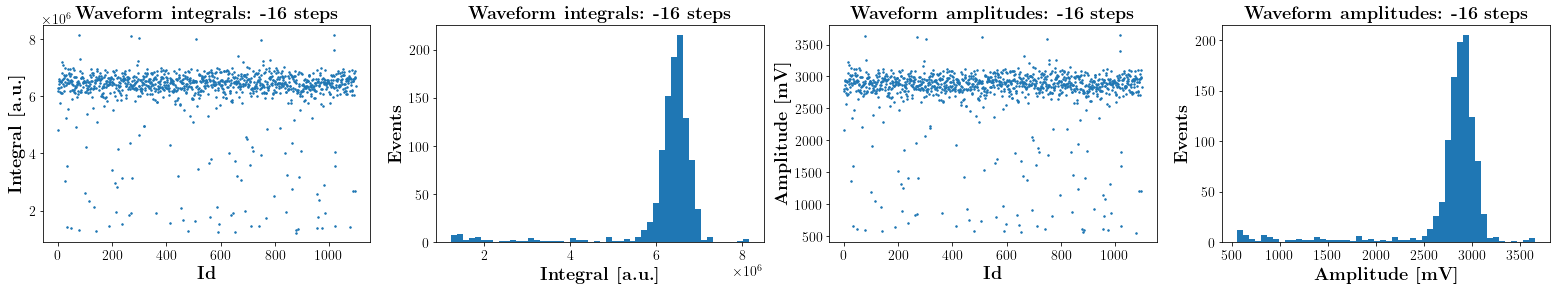

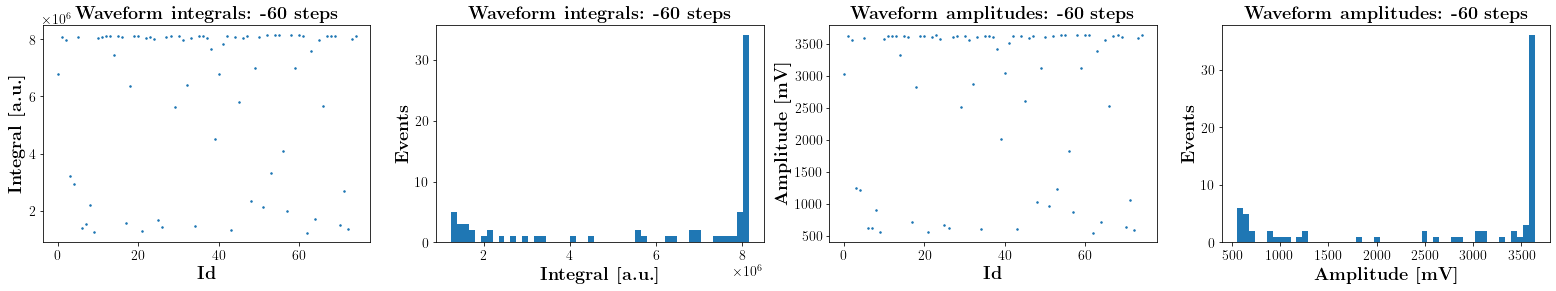

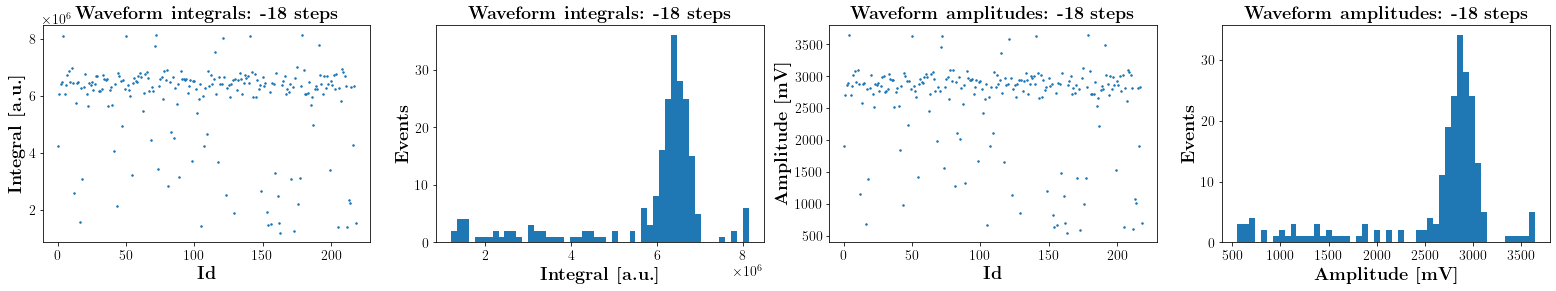

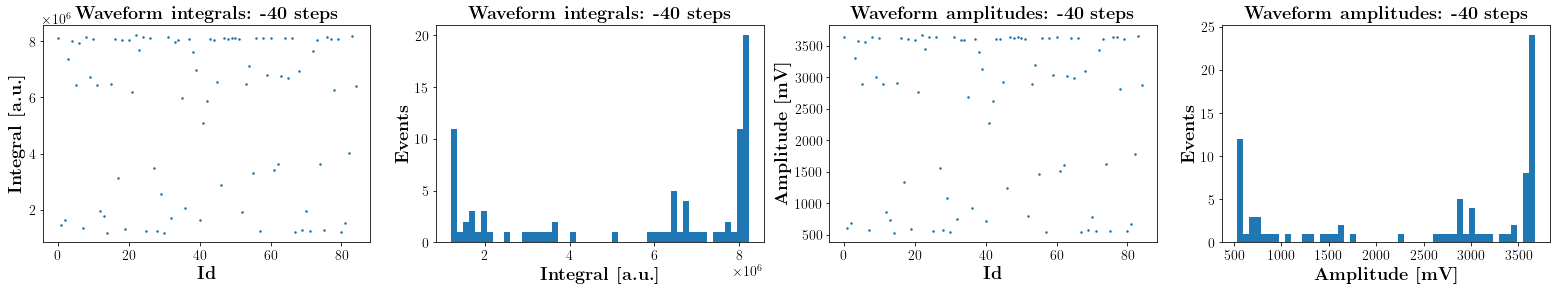

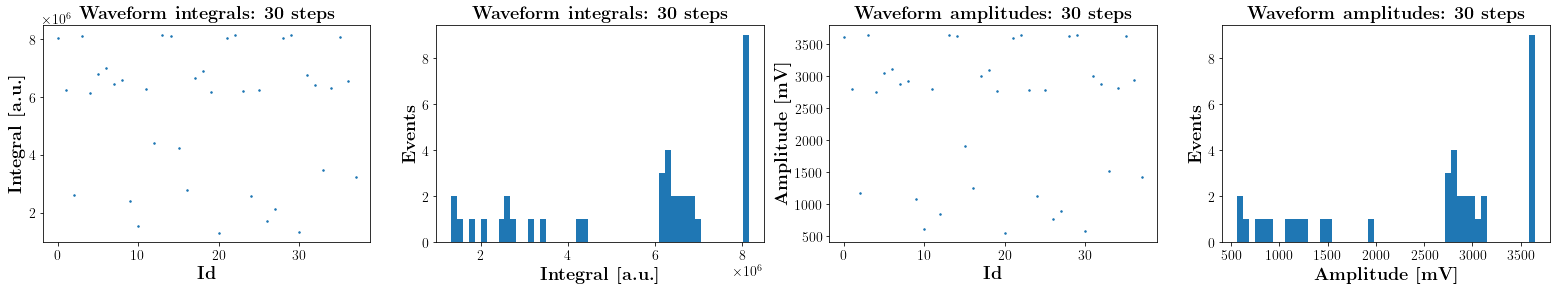

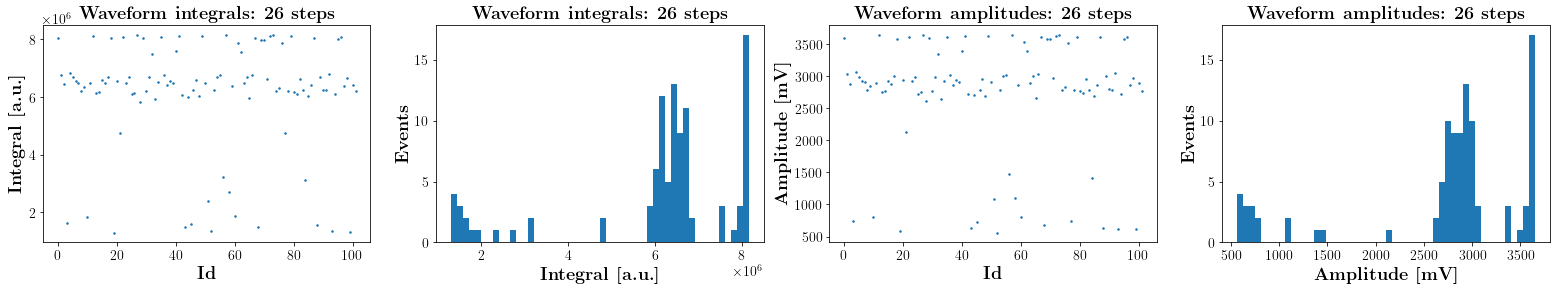

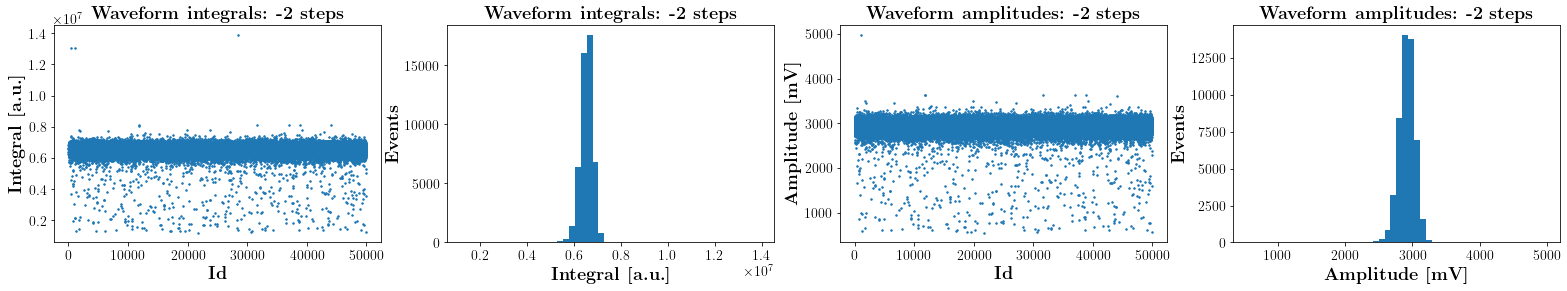

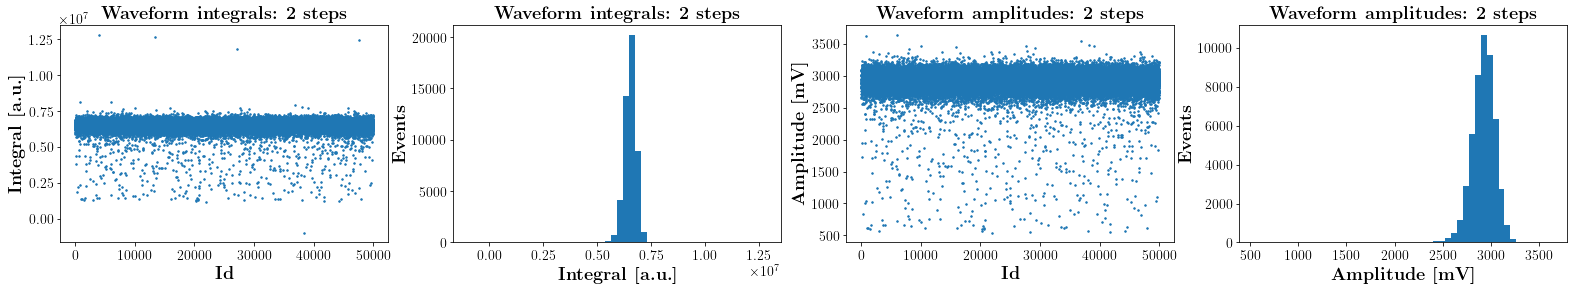

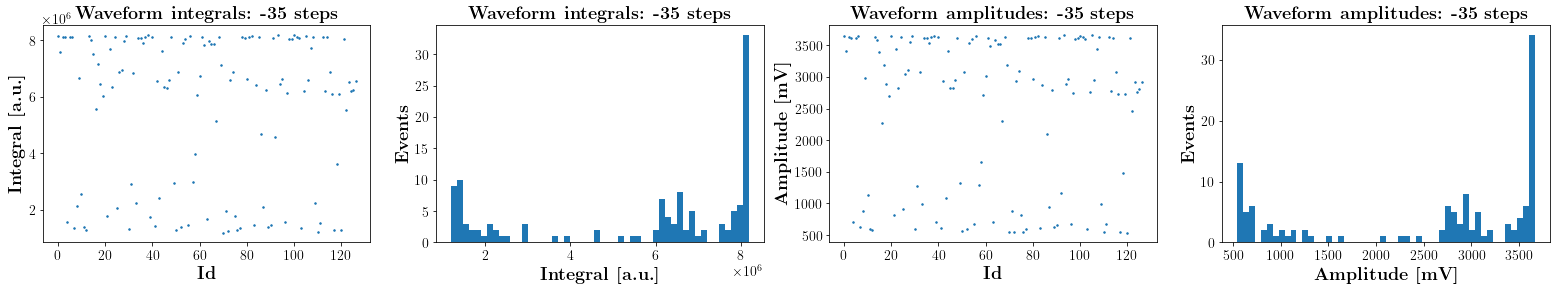

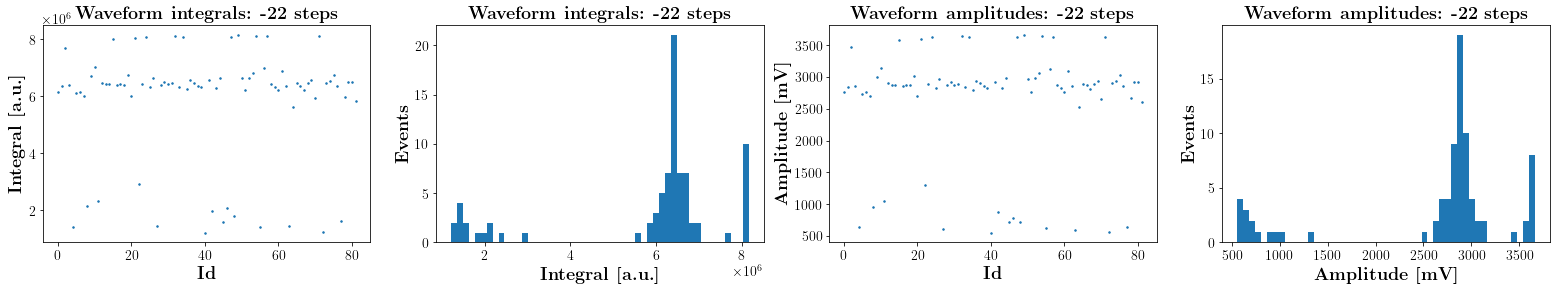

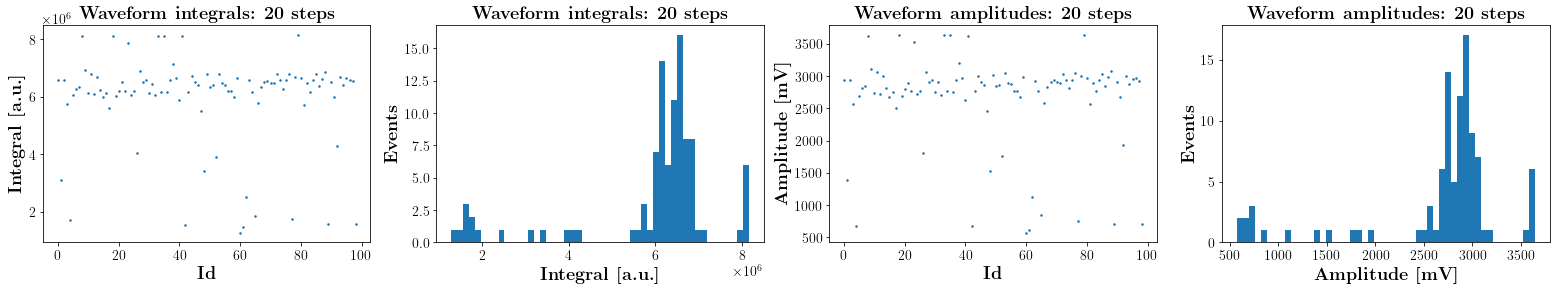

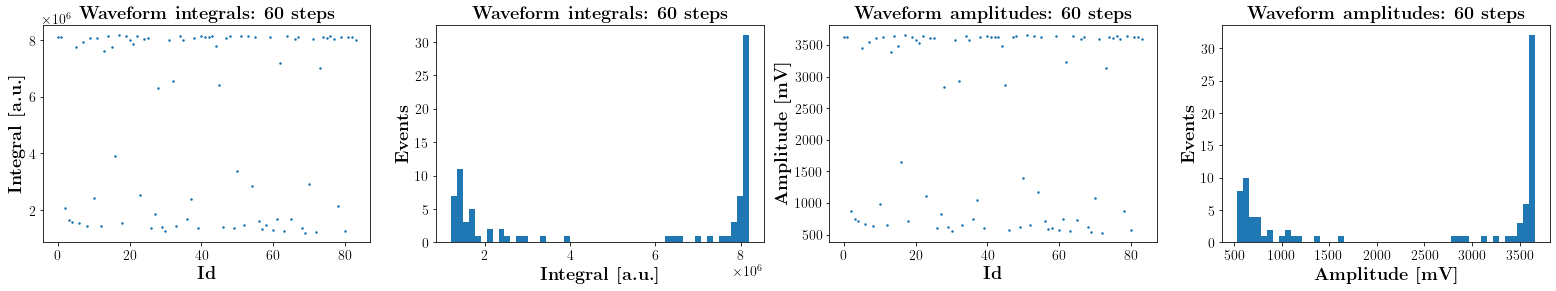

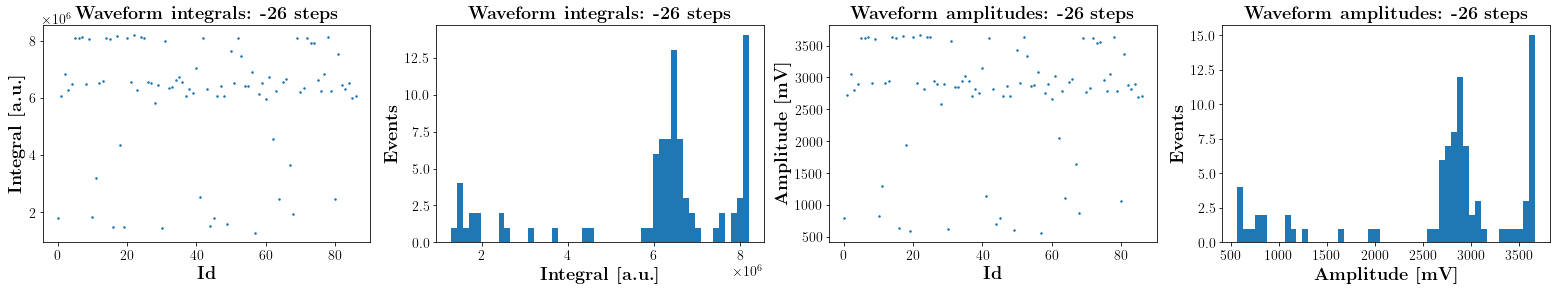

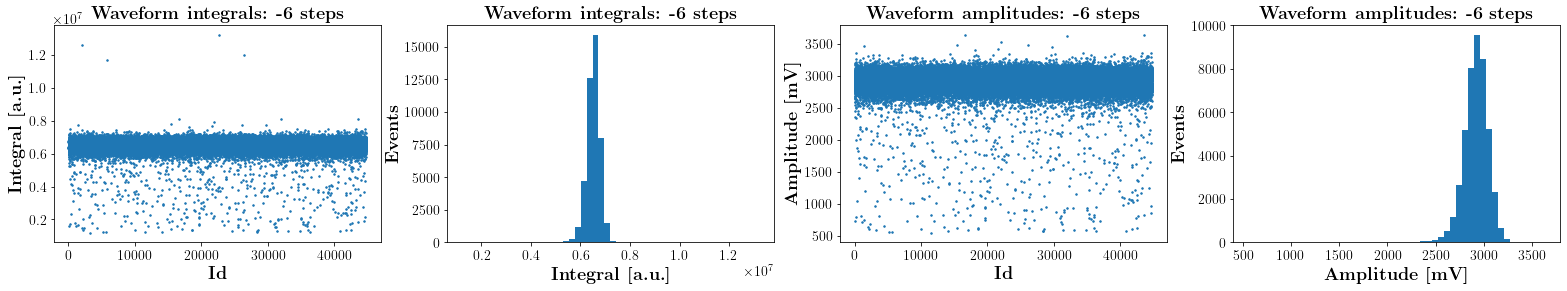

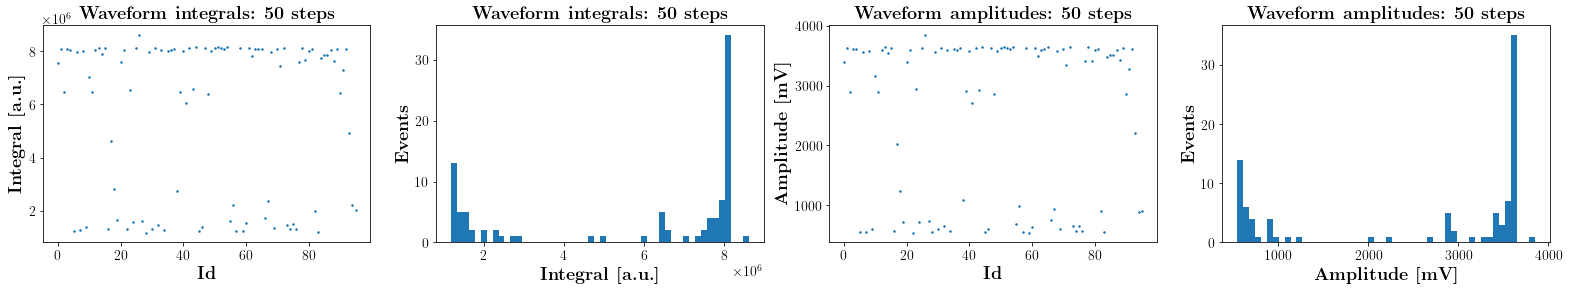

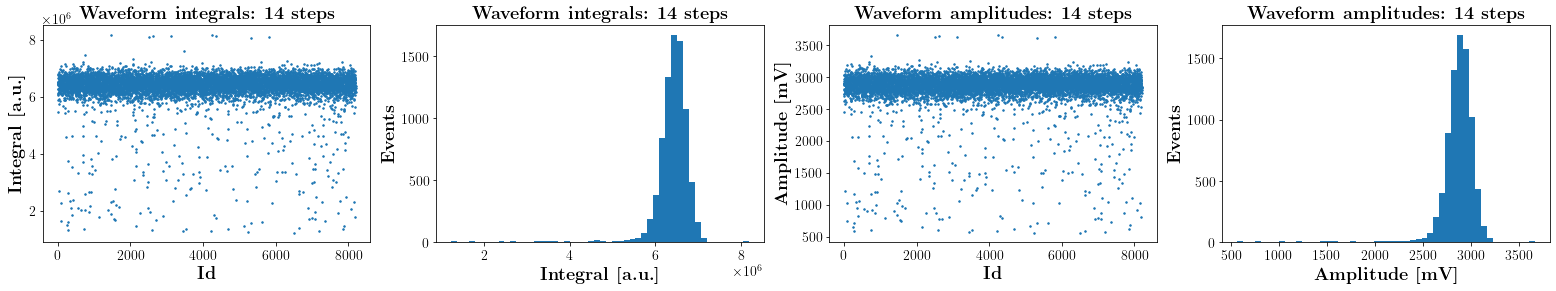

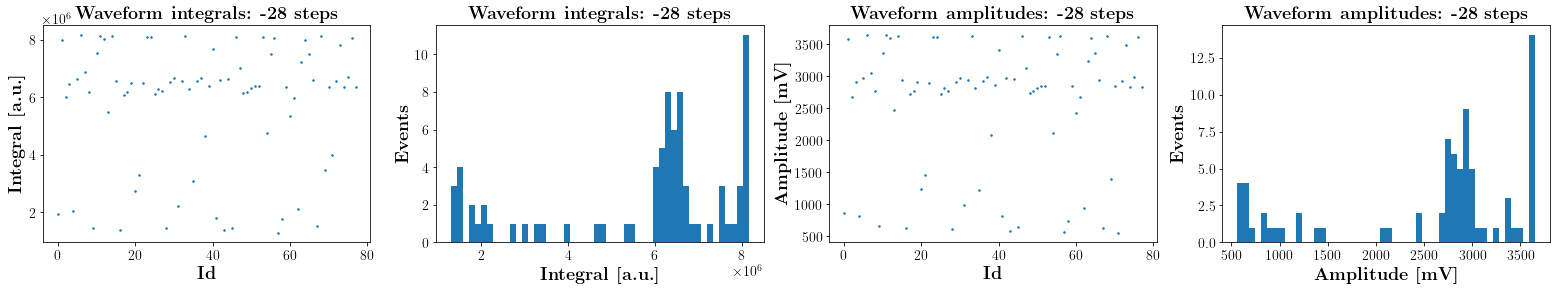

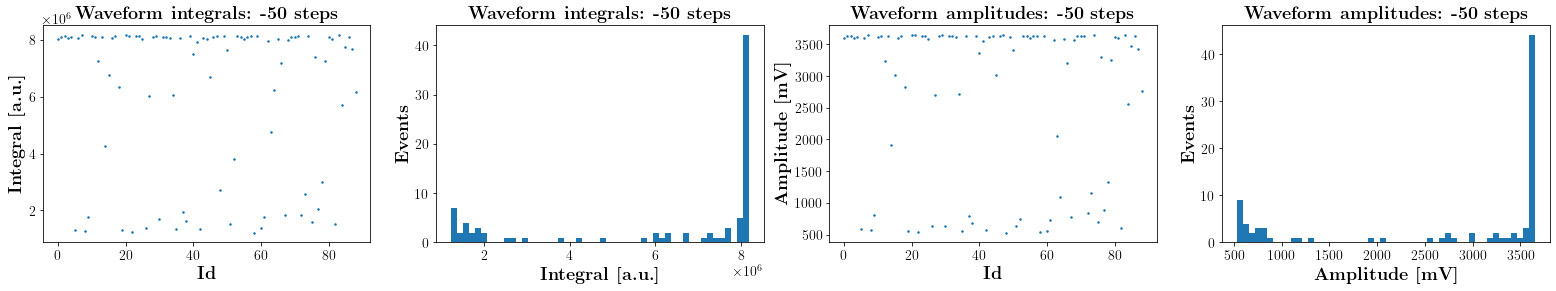

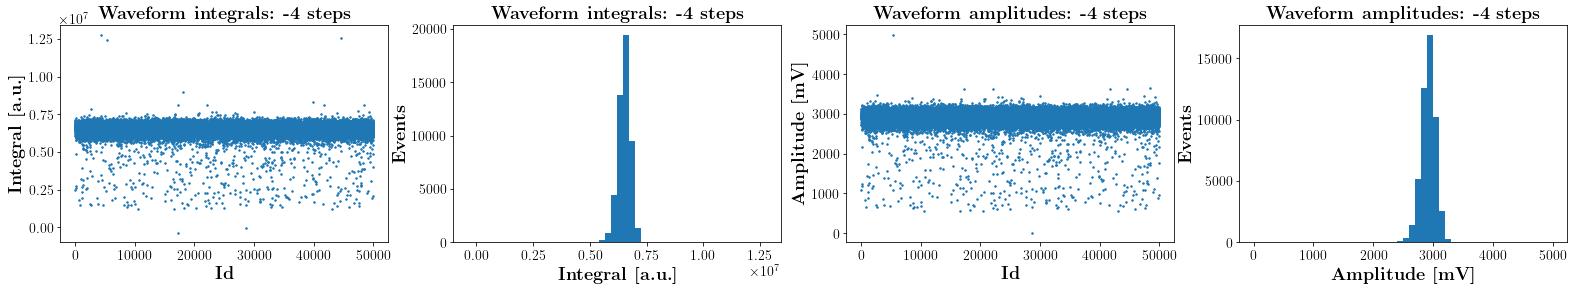

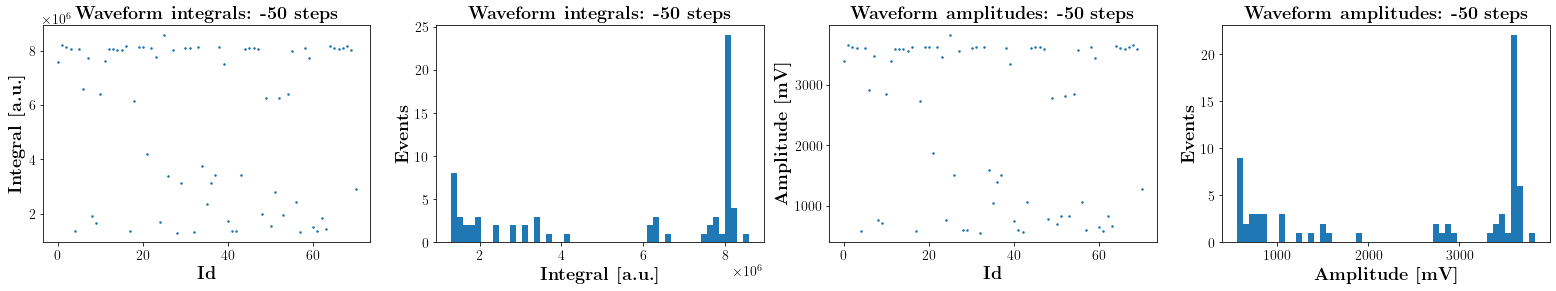

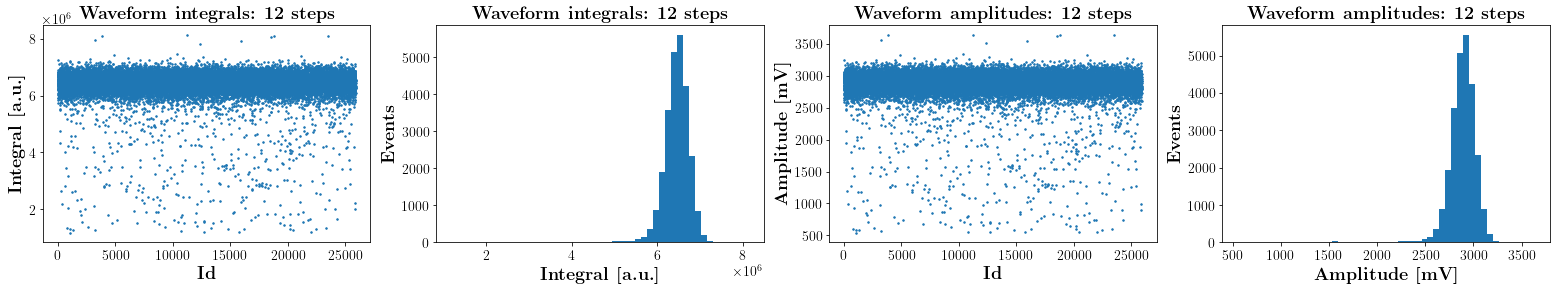

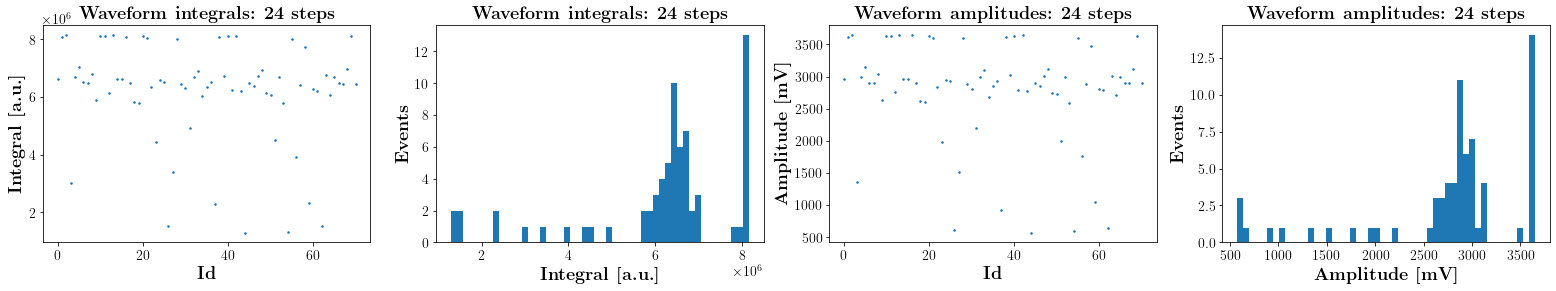

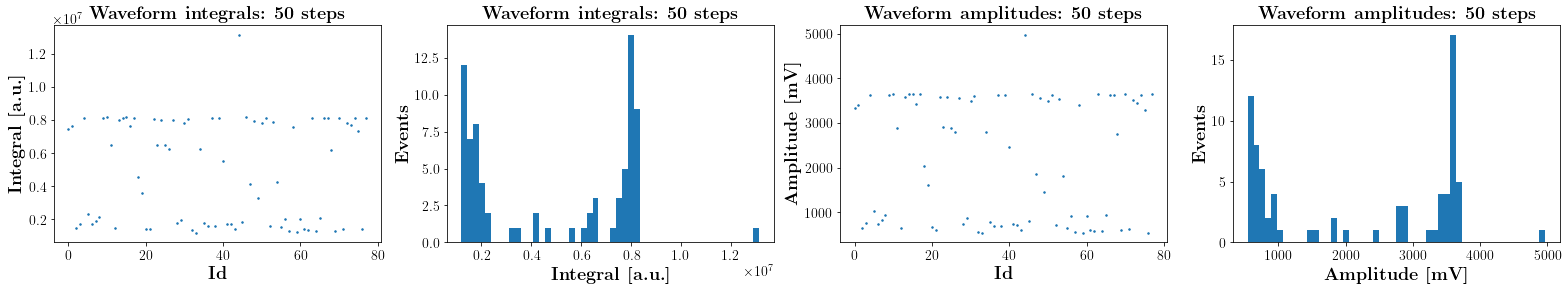

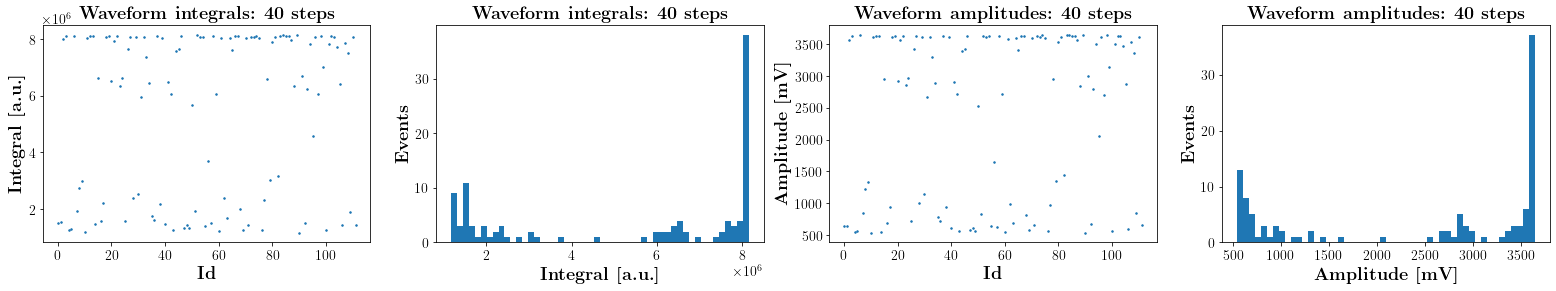

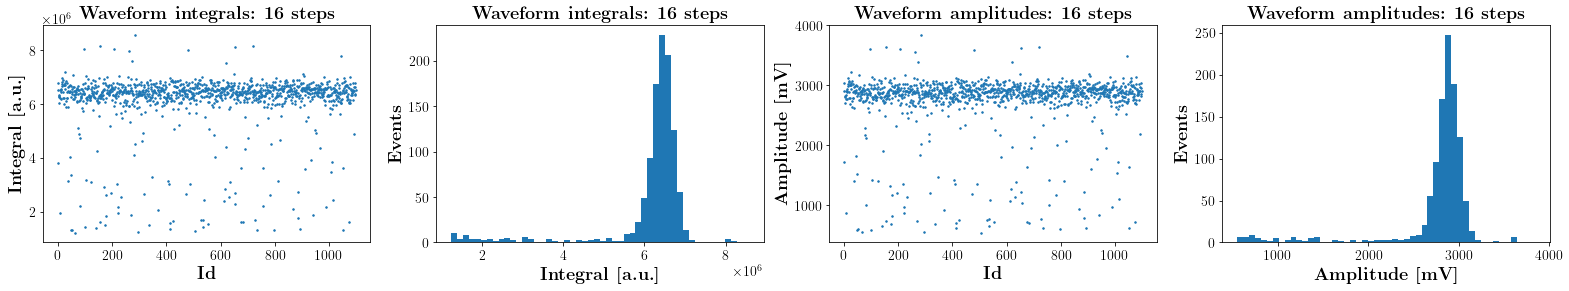

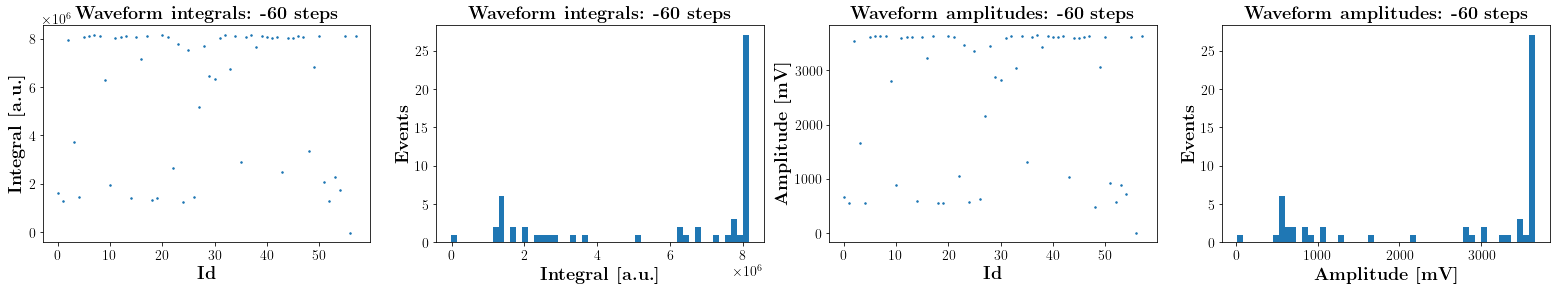

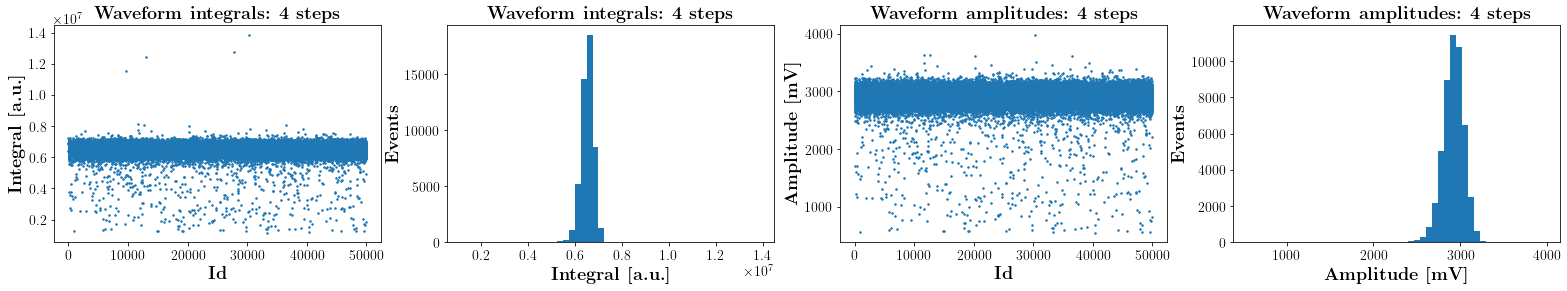

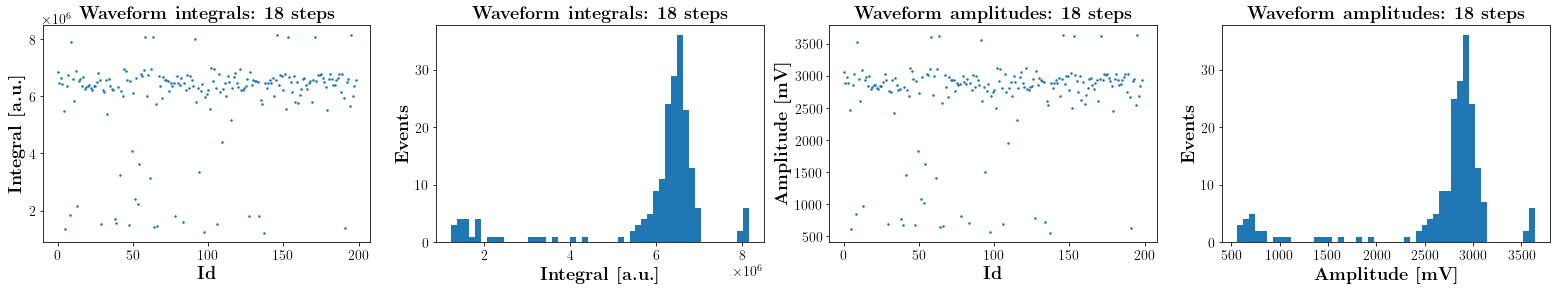

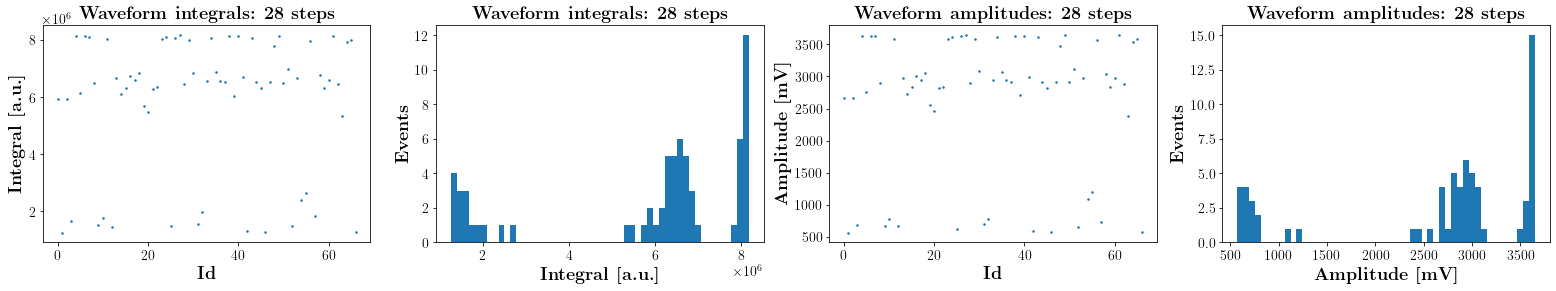

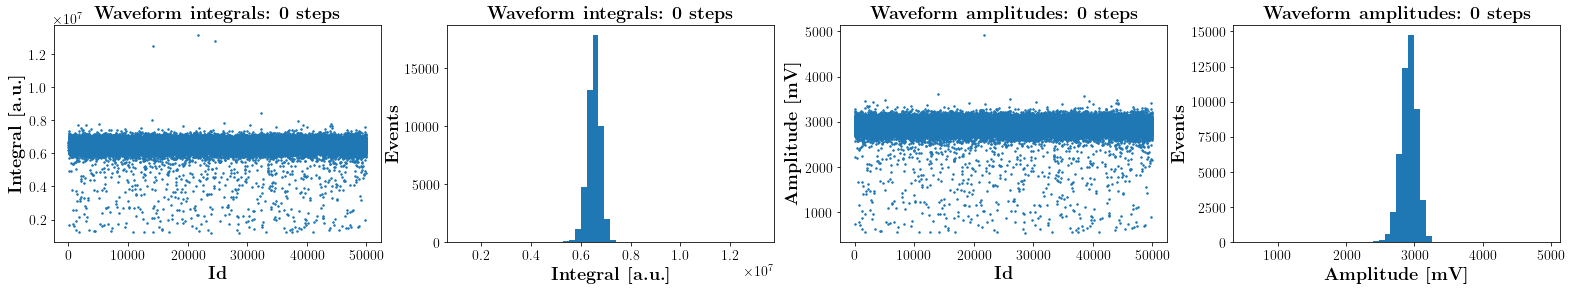

In [15]:
angles = []
events = []
err_angles = []
err_events = []

pico_step = []
pico_rad  = []
pico_deg  = []
pico_seg  = []
pico_ev   = []
pico_t    = []
pico_r    = []

pico_step_err = []
pico_rad_err  = []
pico_deg_err  = []
pico_ev_err   = []
pico_r_err    = []



os.chdir(DATA_PATH)
for d in os.listdir("."):
    # print(d)
    os.chdir(d)
    run = d.split("_")[0]
    
    #######################################################################
    # TAKE DIRECTION FROM DIR NAME
    #######################################################################
    if "DC" in d:
        sign = -1
    elif "SC" in d:
        sign = +1
    else:
        sign = 0
    #######################################################################

    #######################################################################
    # TAKE DATA FROM run FILE
    #######################################################################
    file = open("run")
    line = file.readlines()
    for l in line:
        if (l.startswith("n_segments")):
            n_seg = int(l.split('=')[1].strip())
            pico_seg.append(n_seg)
        if (l.startswith("run_time")):
            run_time = int(l.split('=')[1].strip())
    file.close()
    
    steps = sign * int(''.join(filter(lambda i: i.isdigit(), run))) - SC
    #######################################################################
    
    #######################################################################
    # TAKE DATA FROM run_BlockTimes.txt
    #######################################################################
    times  = np.loadtxt("run_BlockTimes.txt")
    blocks = times.shape[0]
    events = blocks * n_seg
    # print(times.shape)
    if times.shape != (2,):
        t  = times[-1,1] - times[0,0] - np.sum(times[1:,0]-times[:-1,1])
    else:
        t  = run_time
    #######################################################################

    
    #######################################################################
    # TAKE DATA FROM ALL WAVEFORMS
    #######################################################################
    if WAVE2NUMPY:
        # load data and smooth filter with MAV
        data     = np.load(d+".npy")
        data_mav = np.apply_along_axis(moving_average, 1, data, M)

        # compute baseline mask
        baseline_mask = np.arange(data_mav.shape[1])
        baseline_mask = ((baseline_mask<1000) | (baseline_mask>3000))

        # compute baseline and amplitude
        baseline   = np.sum(data_mav[:,baseline_mask], axis=1) / data_mav[:,baseline_mask].shape[1]
        peaks      = np.max(data_mav, axis=1)
        amplitudes = (peaks - baseline) * 10 / 65536 * 1000
        
        # filter events by waveform amplitude
        events = amplitudes[(amplitudes>=MIN_MV) & (amplitudes<=MAX_MV)].shape[0]

        # compute integral
        data_mav_int = np.sum(data_mav, axis=1) - baseline*data_mav.shape[1]

        # compute integral mean and variance
        data_mav_int_mean = np.mean(data_mav_int)
        data_mav_int_var  = np.std(data_mav_int)

        # not so useful (it will be removed)
        if REJECT_3SIGMA:
            mask_t = np.logical_and(data_mav_int<data_mav_int_mean+data_mav_int_var*3, data_mav_int>data_mav_int_mean-data_mav_int_var*3)
            mask_f = np.logical_not(mask_t)
        else:
            mask_t = np.ones(data_mav_int.shape, dtype=bool)
            mask_f = np.logical_not(mask_t)

        if PLOT_WAVE:
            fig=plt.figure(figsize=(6*4+3, 4))
            plt.subplot(1,4,1)
            if mask_f.shape[0] != 0:
                plt.plot(np.where(mask_t)[0], data_mav_int[mask_t], "o", markersize=1.5)
                plt.plot(np.where(mask_f)[0], data_mav_int[mask_f], "o", markersize=1.5)
            else:
                plt.plot(np.where(mask_t)[0], data_mav_int[mask_t], "o", markersize=1.5)
            plt.xlabel(r"\bf{Id}")
            plt.ylabel(r"\bf{Integral [a.u.]}")
            plt.title(r"\bf{Waveform integrals: " + str(steps) + " steps}")

            plt.subplot(1,4,2)
            if mask_f.shape[0] != 0:
                plt.hist([data_mav_int[mask_t], data_mav_int[mask_f]], bins=50, stacked=True)
            else:
                plt.hist(data_mav_int[mask_t], bins=50, stacked=True)
            # plt.yscale("log")
            plt.xlabel(r"\bf{Integral [a.u.]}")
            plt.ylabel(r"\bf{Events}")
            plt.title(r"\bf{Waveform integrals: " + str(steps) + " steps}")
            
            plt.subplot(1,4,3)
            plt.plot(np.arange(0,amplitudes.shape[0]), amplitudes, "o", markersize=1.5)
            plt.xlabel(r"\bf{Id}")
            plt.ylabel(r"\bf{Amplitude [mV]}")
            plt.title(r"\bf{Waveform amplitudes: " + str(steps) + " steps}")
            
            plt.subplot(1,4,4)
            plt.hist(amplitudes, bins=50)
            # plt.yscale("log")
            plt.xlabel(r"\bf{Amplitude [mV]}")
            plt.ylabel(r"\bf{Events}")
            plt.title(r"\bf{Waveform amplitudes: " + str(steps) + " steps}")
            plt.show()
    #######################################################################
    
    
    #######################################################################
    # COMPUTE RELEVANT QUANTITIES
    #######################################################################
    pico_step.append(steps)
    pico_rad.append(steps * 0.9 * np.pi / 180.0)
    pico_deg.append(steps * 0.9)
    pico_t.append(t)
    pico_ev.append(events)
    pico_r.append(events / t * 3600)
    #######################################################################
    
    #######################################################################
    # COMPUTE ERRORS
    #######################################################################
    pico_step_err.append(0.05) # 1.0 / np.sqrt(12.0)
    pico_rad_err .append(0.05 * 0.9 * np.pi / 180.0)
    pico_deg_err .append(0.05 * 0.9)
    pico_ev_err  .append(np.sqrt(events))
    pico_r_err   .append(np.sqrt(events) / t * 3600)
    #######################################################################

    os.chdir(DATA_PATH)

### Events distribution

In [16]:
col = palette.brewer['RdYlGn'][10]

In [17]:
d = {
    "pico_step"     : pico_step,
    "pico_rad"      : pico_rad,
    "pico_deg"      : pico_deg,
    "pico_seg"      : pico_seg,
    "pico_ev"       : pico_ev,
    "pico_t"        : pico_t,
    "pico_r"        : pico_r,
    "pico_step_err" : pico_step_err,
    "pico_rad_err"  : pico_rad_err,
    "pico_deg_err"  : pico_deg_err,
    "pico_ev_err"   : pico_ev_err,
    "pico_r_err"    : pico_r_err
}

df = pd.DataFrame(data=d)
df = df.sort_values(by=['pico_step'])

In [18]:
df = df.groupby(["pico_step", "pico_rad", "pico_deg", "pico_seg", "pico_step_err", "pico_rad_err", "pico_deg_err"], as_index=False).sum()

df["pico_r"]      = df["pico_ev"] / df["pico_t"] * 3600
df["pico_ev_err"] = np.sqrt(df["pico_ev"])
df["pico_r_err"]  = df["pico_ev_err"] / df["pico_t"] * 3600

In [19]:
df

,pico_step,pico_rad,pico_deg,pico_seg,pico_step_err,pico_rad_err,pico_deg_err,pico_ev,pico_t,pico_r,pico_ev_err,pico_r_err
0,-60,-0.942478,-54.0,1,0.05,0.000785,0.045,49,174966.369999,1.008194,7.000000,0.144028
1,-50,-0.785398,-45.0,1,0.05,0.000785,0.045,45,133428.859999,1.214130,6.708204,0.180992
2,-40,-0.628319,-36.0,1,0.05,0.000785,0.045,38,86572.940000,1.580170,6.164414,0.256337
3,-35,-0.549779,-31.5,1,0.05,0.000785,0.045,41,43494.490000,3.393533,6.403124,0.529981
4,-30,-0.471239,-27.0,1,0.05,0.000785,0.045,19,18678.880000,3.661890,4.358899,0.840095
5,-28,-0.439823,-25.2,1,0.05,0.000785,0.045,44,18152.120000,8.726253,6.633250,1.315532
6,-26,-0.408407,-23.4,1,0.05,0.000785,0.045,51,18657.530000,9.840531,7.141428,1.377950
7,-24,-0.376991,-21.6,1,0.05,0.000785,0.045,50,10887.079999,16.533359,7.071068,2.338170
8,-22,-0.345575,-19.8,1,0.05,0.000785,0.045,58,10831.680000,19.276788,7.615773,2.531166
9,-20,-0.314159,-18.0,10,0.05,0.000785,0.045,85,7614.090000,40.188650,9.219544,4.359071


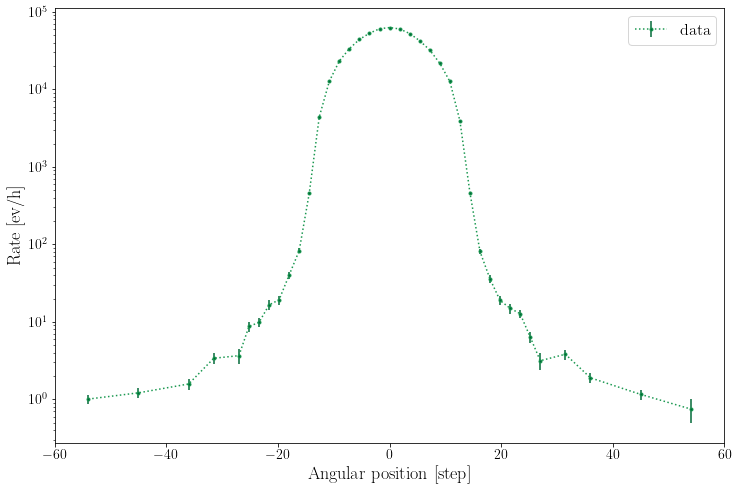

In [20]:
plt.figure(figsize=(12,8))
plt.yscale("log")
plt.errorbar(df["pico_deg"],
             df["pico_r"],
             #xerr=df["pico_step_err"],
             yerr=df["pico_r_err"],
             fmt=':o',
             markerfacecolor=col[0],
             color=col[1],
             ecolor=col[0],
             label="data",
             alpha=1,
             markersize=3) #fillstyle="none"
plt.xlabel("Angular position [step]")
plt.ylabel("Rate [ev/h]")
plt.xlim(-60,60)
plt.legend()
plt.show()

## Save data

In [21]:
if SAVE_DATA:
    df.to_csv(SAVE_PATH + "pico_data_gold.csv", index=False)

***

<br>
<br>
<br>
<br>
<br>

***

# **PicoScope**: analysis of scattering profile

<span style="color:gray">
    <font size="6">
        <b>tin</b>
    </font>
</span>

## Preliminary operations

### Paths

In [37]:
USER_PATH = "/home/rocco/University/APL/Lab/"
DATA_PATH = USER_PATH + "data/tin"
SAVE_PATH = "../../plots/data/picoscope/"

### Flags

In [45]:
UNZIP_DATA    = False
WAVE2NUMPY    = True
PLOT_WAVE     = True
PLOT_MAV_WAVE = True
REJECT_3SIGMA = False
SAVE_DATA     = True
VERBOSE       = True

### Load packages

In [39]:
import os
import sys
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import bokeh.palettes as palette

### Settings

In [40]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=16)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('figure', titlesize=18)   # fontsize of the figure title

### Constants

In [41]:
PATIENCE = 1000
MIN_MV   = 2400
MAX_MV   = 3300

### Functions

In [42]:
def moving_average(x, M):
    return np.convolve(x, np.ones(M), 'valid') / M

## Convert waveform files to numpy array and store

### Unzip all data archives and get number of events

In [46]:
if UNZIP_DATA:
    os.chdir(DATA_PATH)
    for d in os.listdir("."):
        os.chdir(d)
        
        if VERBOSE:
            print(d)

        if not os.path.exists("data"):
            os.system("unzip data.zip -d data")
        os.chdir("../")

### Convert to numpy array

In [61]:
if WAVE2NUMPY:
    os.chdir(DATA_PATH)
    for d in os.listdir("."):
        os.chdir(d)
        
        if VERBOSE:
            print("Processing:", d)

        if not os.path.exists(d+".npy"):
            N = len(os.listdir("./data"))
            M = 5000

            data = np.zeros((N,M),dtype=np.int16)
            for f,i in zip(os.listdir("./data"), range(N)):
                if (i % PATIENCE == 0) and VERBOSE:
                    sys.stdout.write("\r    Completeness : "+str(round(i/N*100,1))+"%")
                
                data[i,:] = np.loadtxt("./data/" + f)
            np.save(d+".npy", data)
            os.system("rm -rf ./data")
        
        if VERBOSE:
            sys.stdout.write("\n")

        os.chdir("../")

Processing: 17_2_DC

Processing: 13_1_SC

Processing: 73_1_SC

Processing: 9_1_SC

Processing: 25_1_SC

Processing: 3_1_SC

Processing: 21_1_SC

Processing: 39_1_SC

Processing: 68_1_SC

Processing: 7_2_DC

Processing: 41_1_SC

Processing: 19_1_SC

Processing: 83_1_SC
    Completeness : 0.0%
Processing: 43_1_SC

Processing: 23_1_SC

Processing: 55_1_SC

Processing: 17_1_SC

Processing: 15_1_SC

Processing: 7_1_DC

Processing: 63_1_SC

Processing: 59_1_SC

Processing: 31_1_SC

Processing: 35_1_SC

Processing: 2_1_DC

Processing: 11_1_SC

Processing: 53_1_SC

Processing: 7_1_SC

Processing: 27_1_SC

Processing: 83_2_SC
    Completeness : 0.0%
Processing: 47_1_SC

Processing: 5_1_SC

Processing: 17_3_DC

Processing: 29_1_SC

Processing: 17_1_DC

Processing: 45_1_SC

Processing: 57_1_SC

Processing: 83_3_SC
    Completeness : 0.0%
Processing: 73_2_SC

Processing: 49_1_SC

Processing: 37_1_SC

Processing: 51_1_SC

Processing: 61_1_SC

Processing: 33_1_SC



## Analysis

In [62]:
M  = 20    # moving average (MAV) filter M
SC = 33    # picoscoper center in steps

### Collect data angle

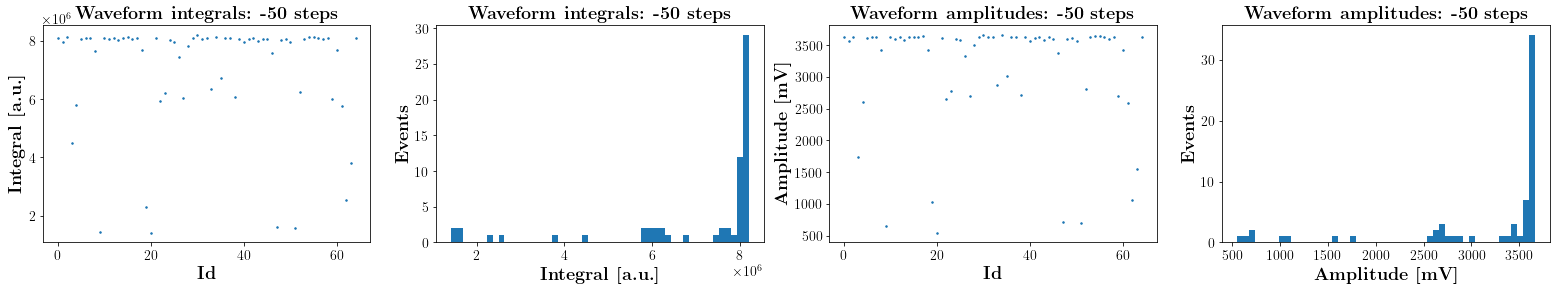

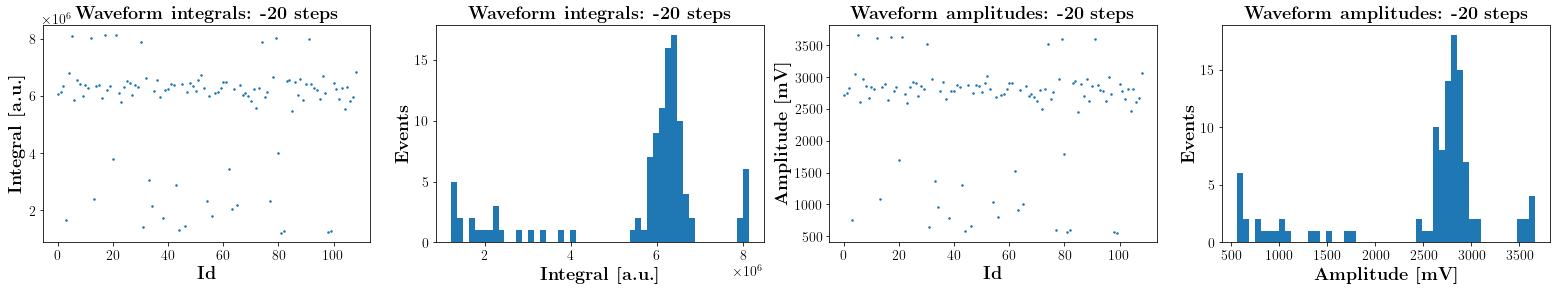

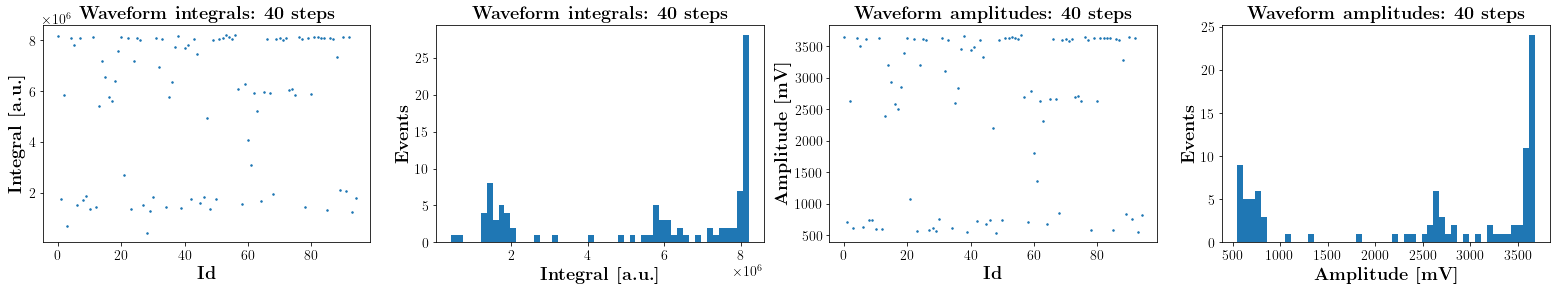

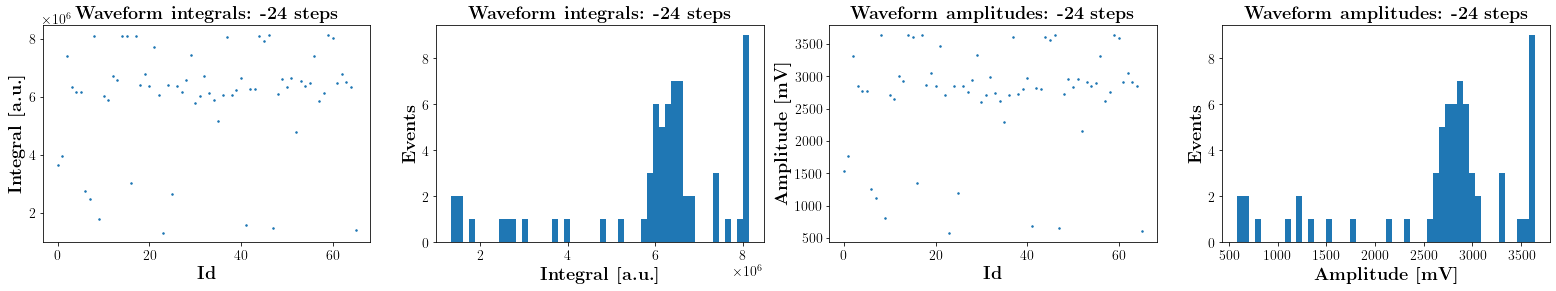

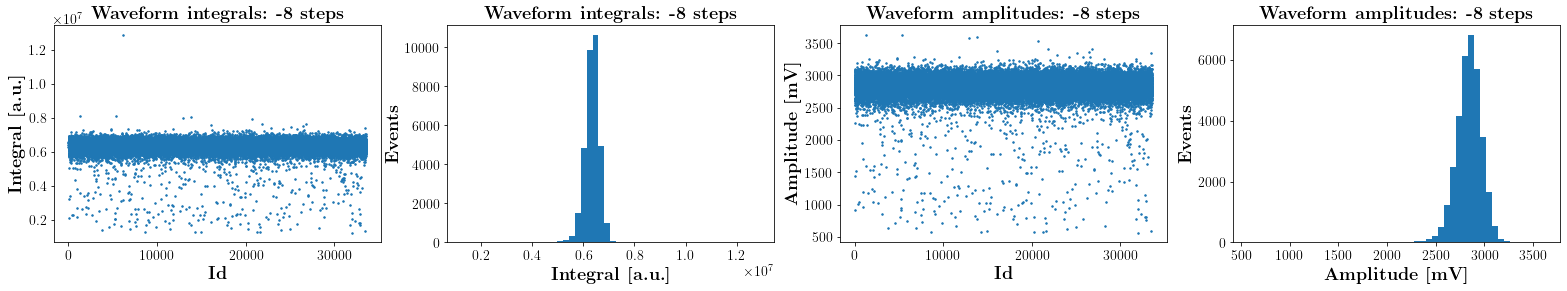

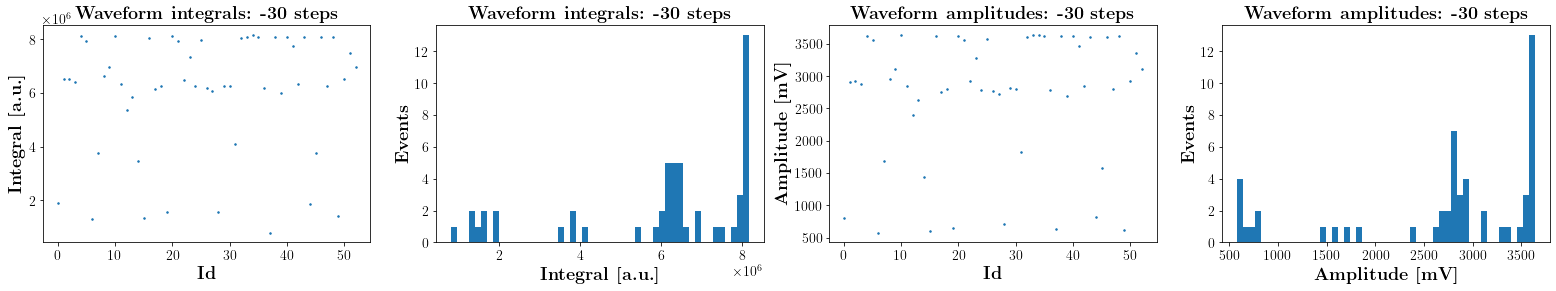

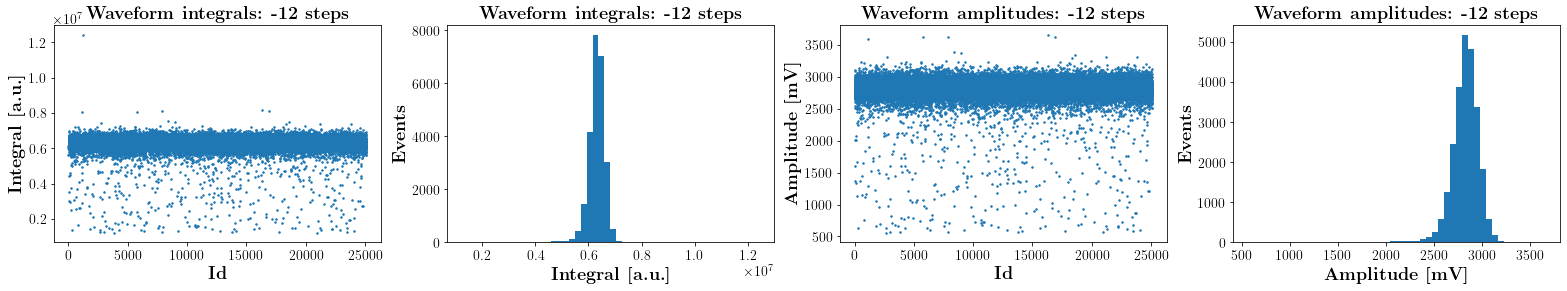

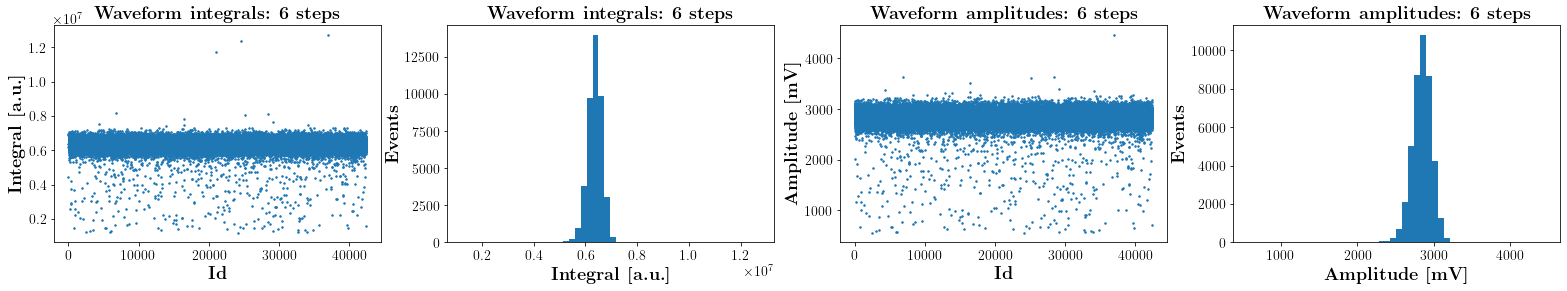

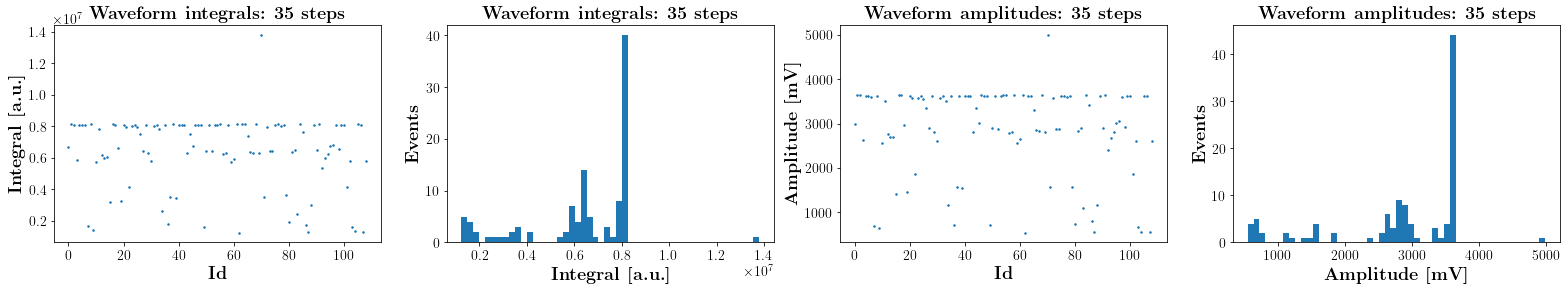

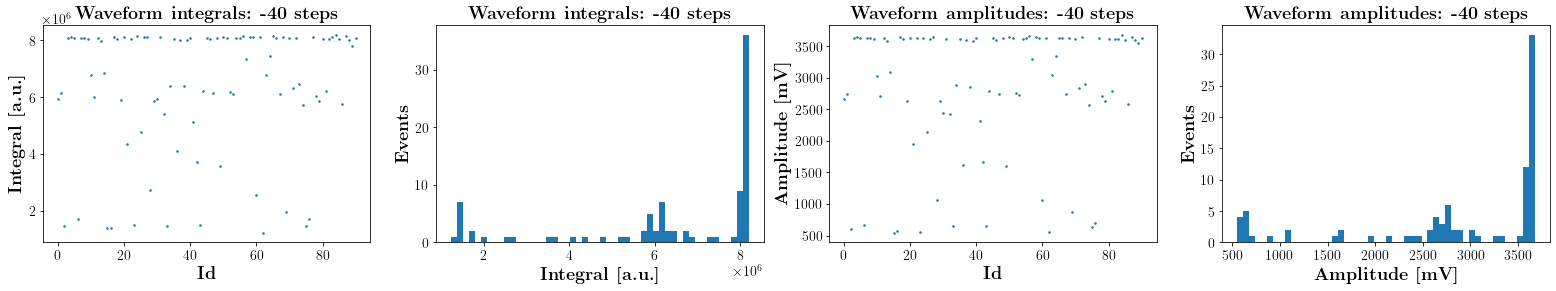

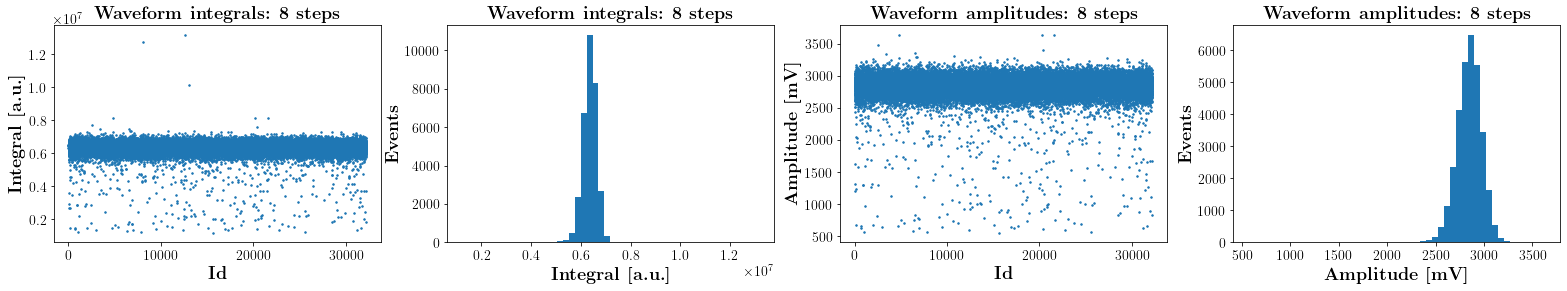

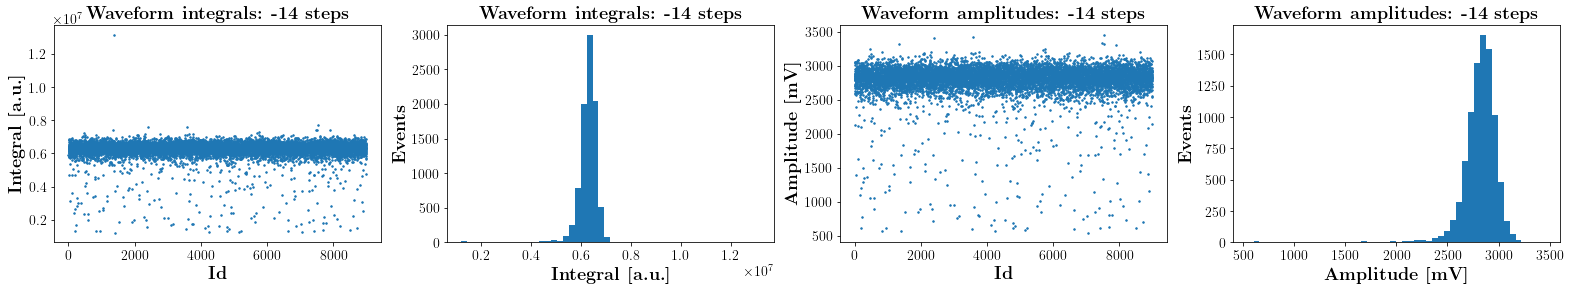

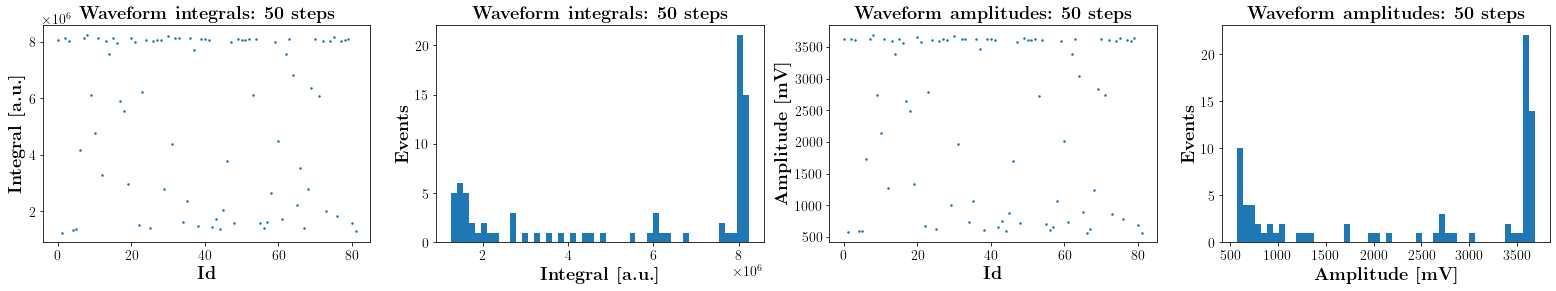

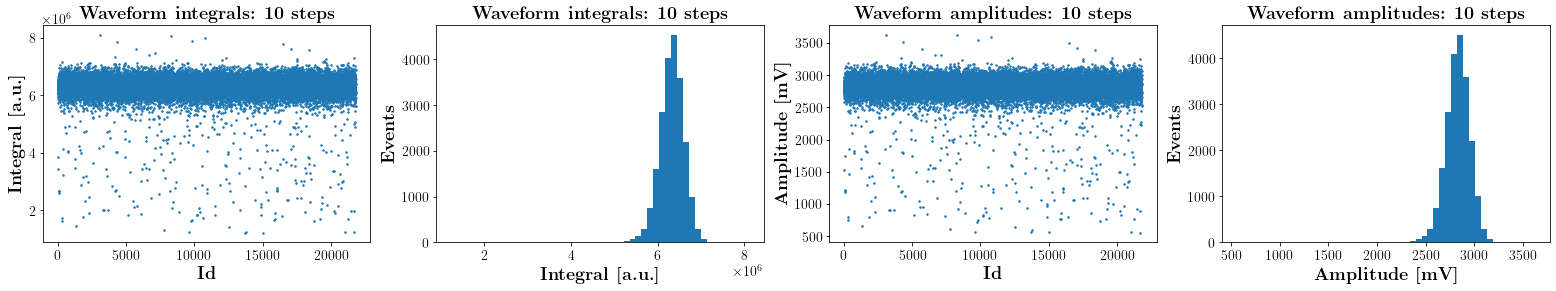

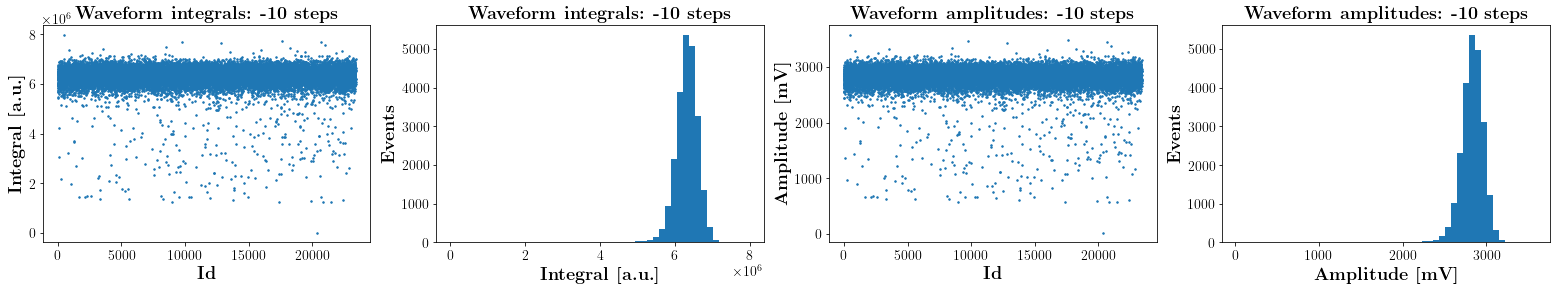

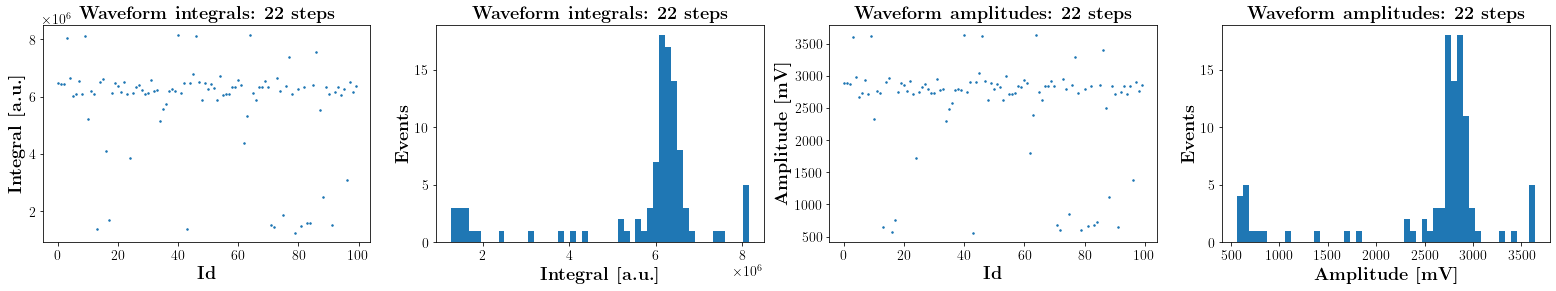

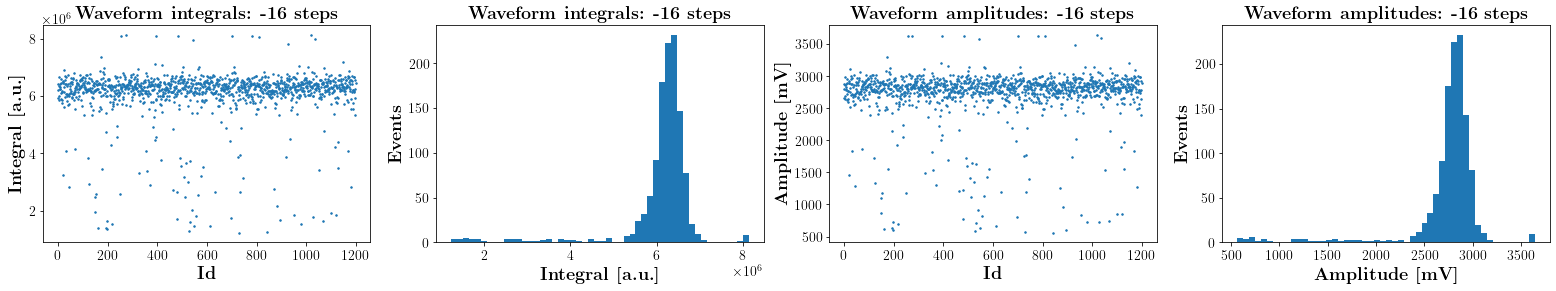

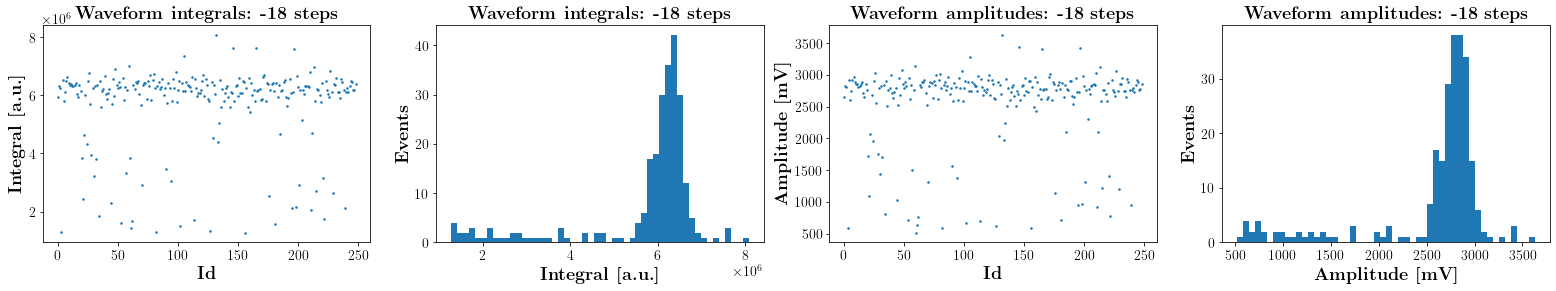

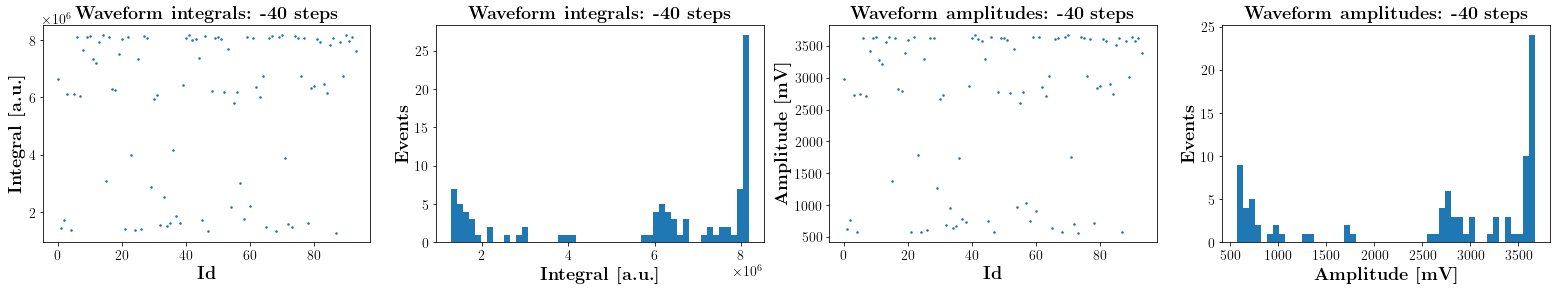

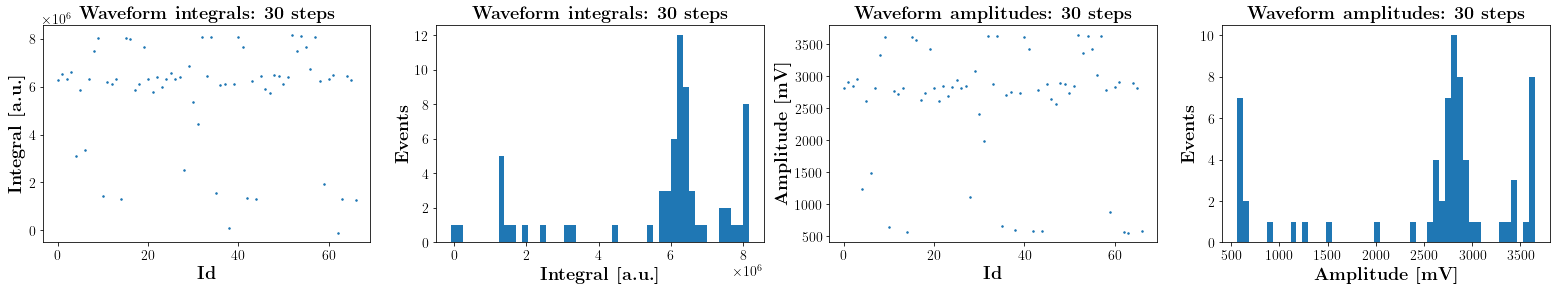

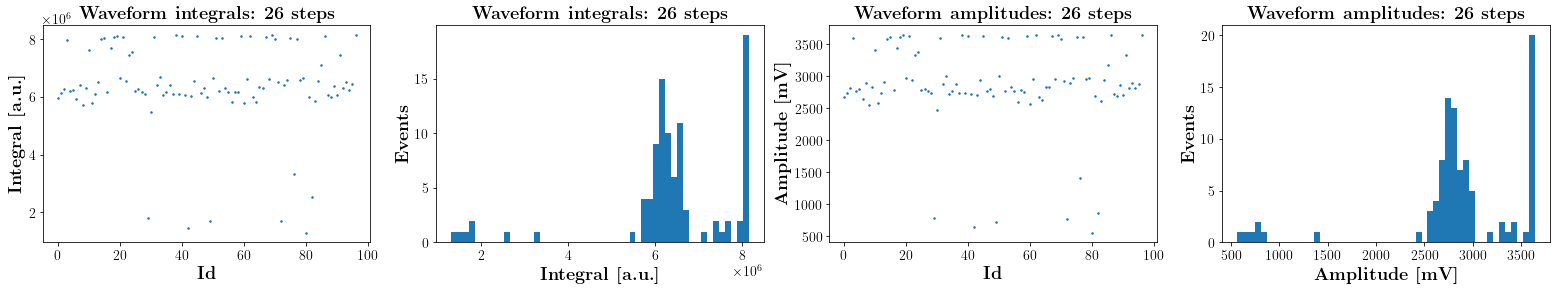

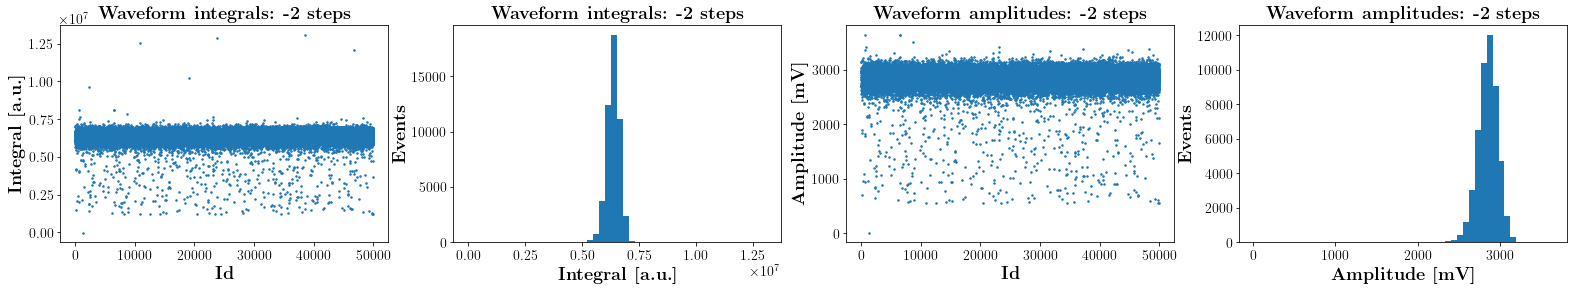

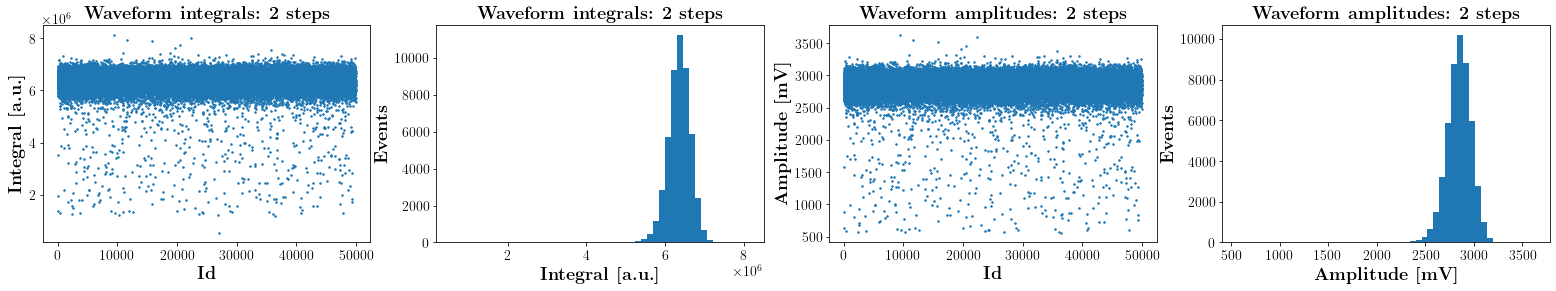

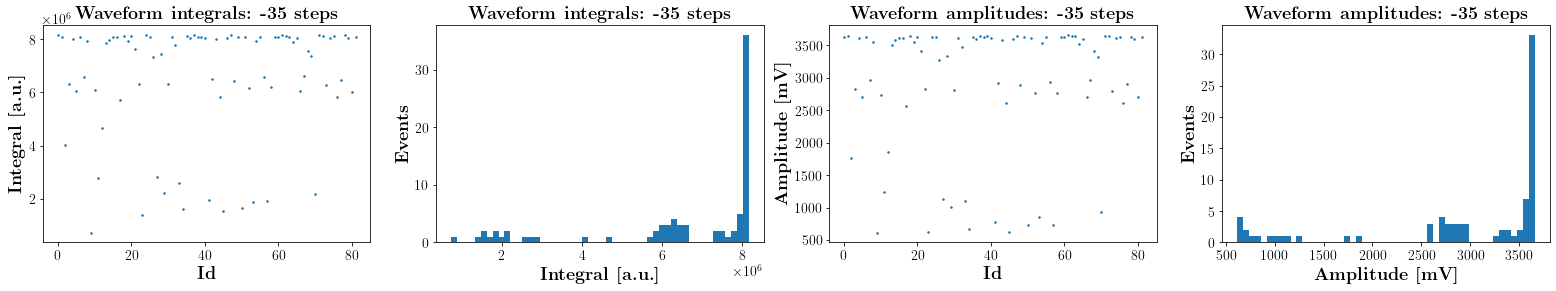

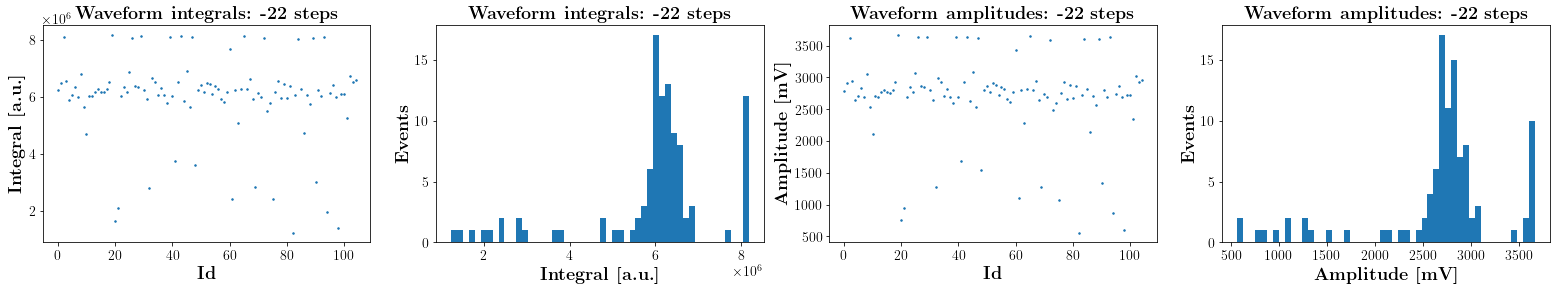

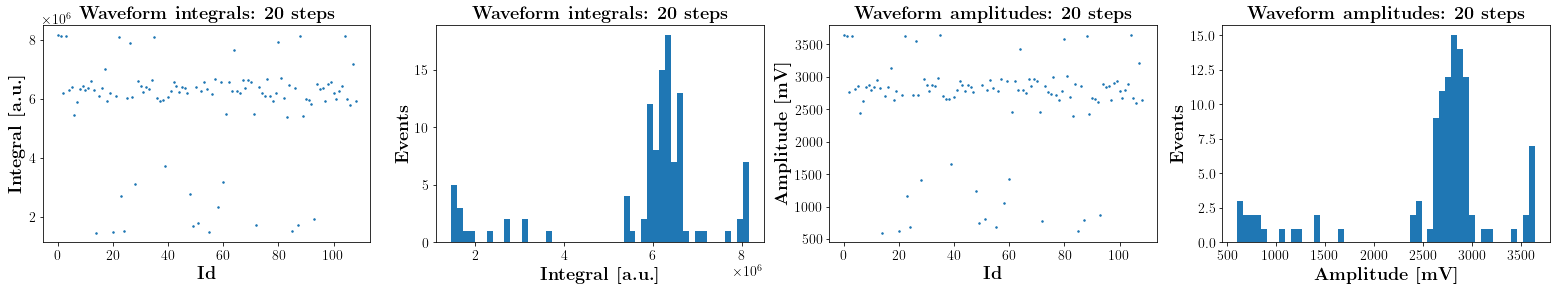

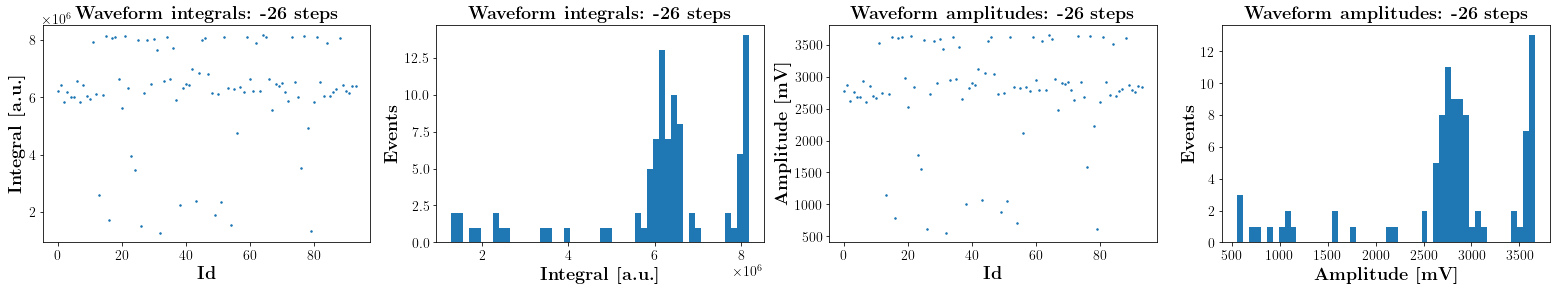

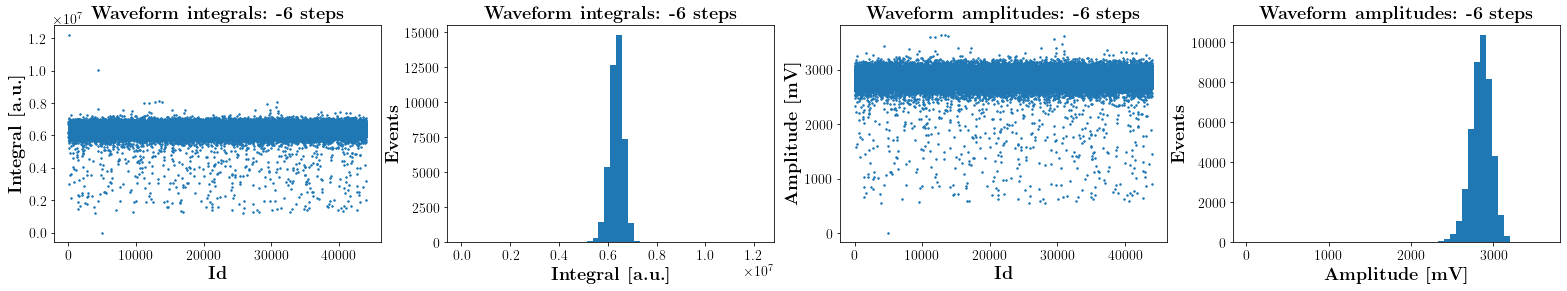

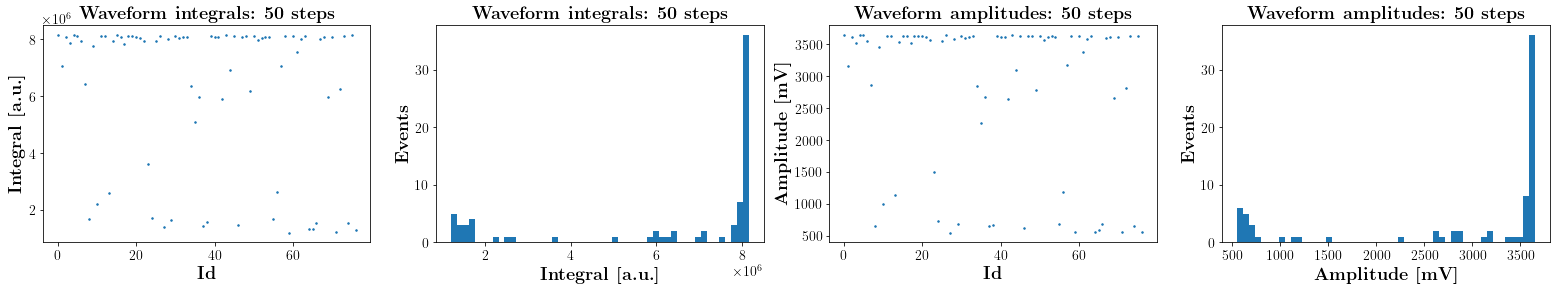

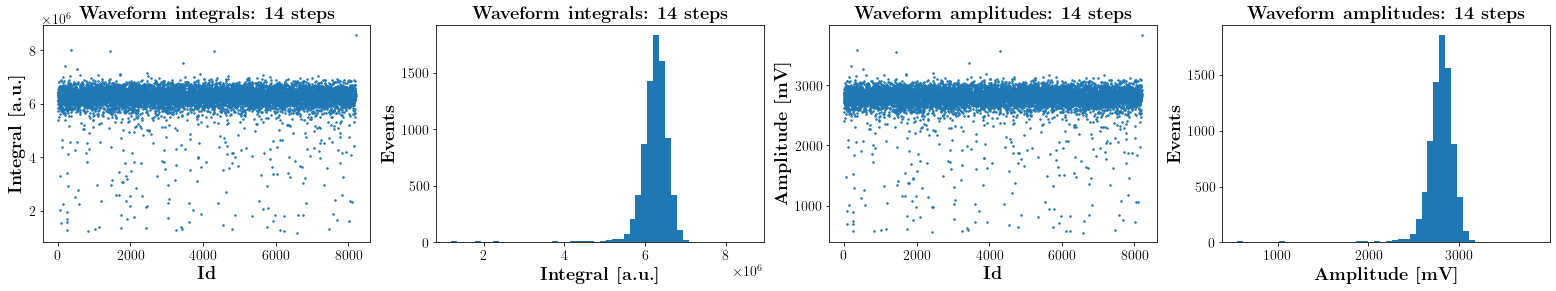

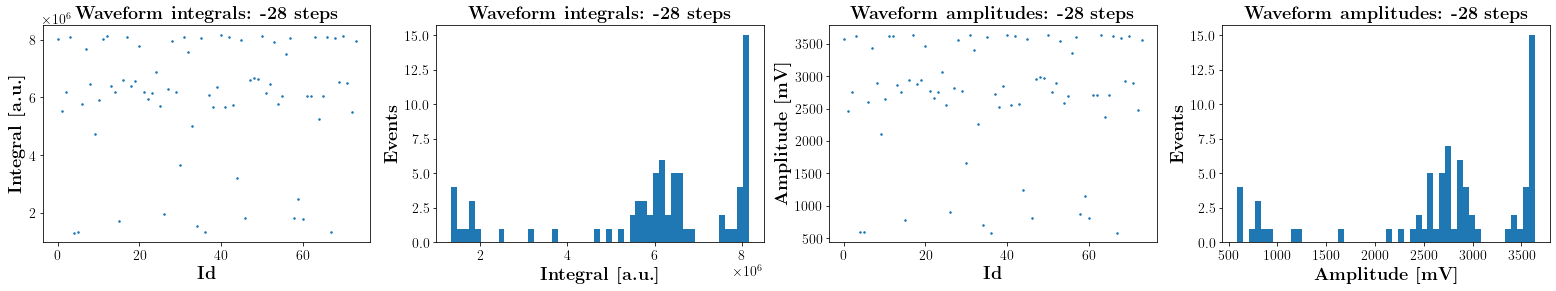

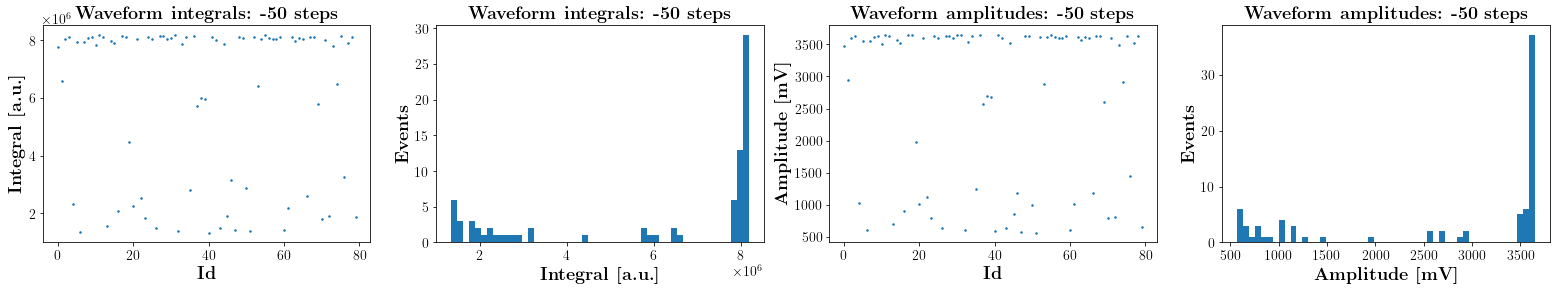

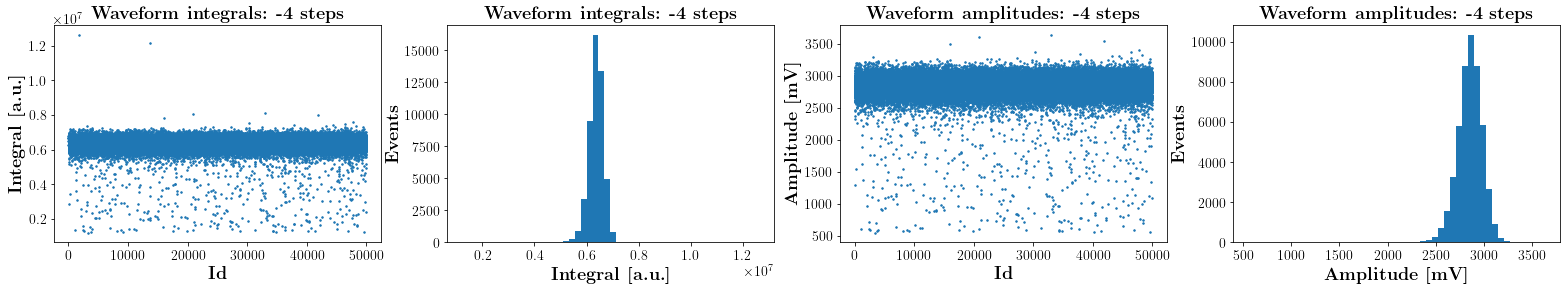

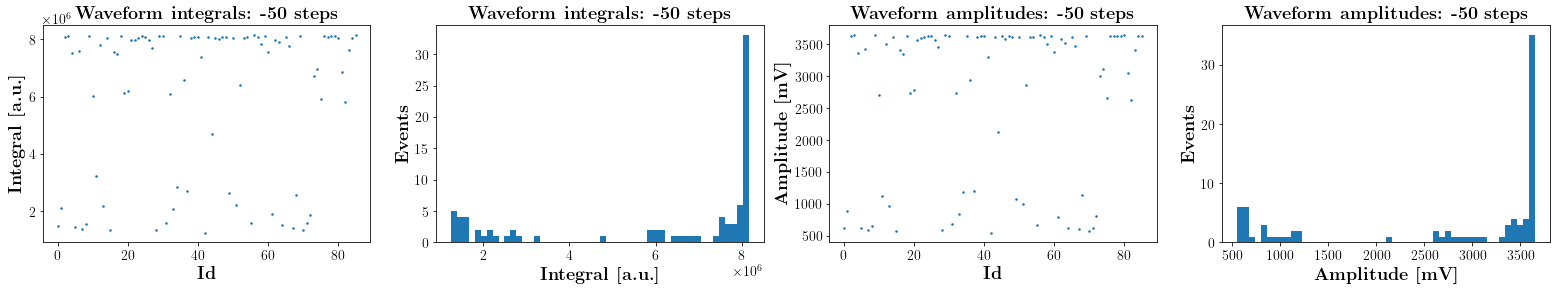

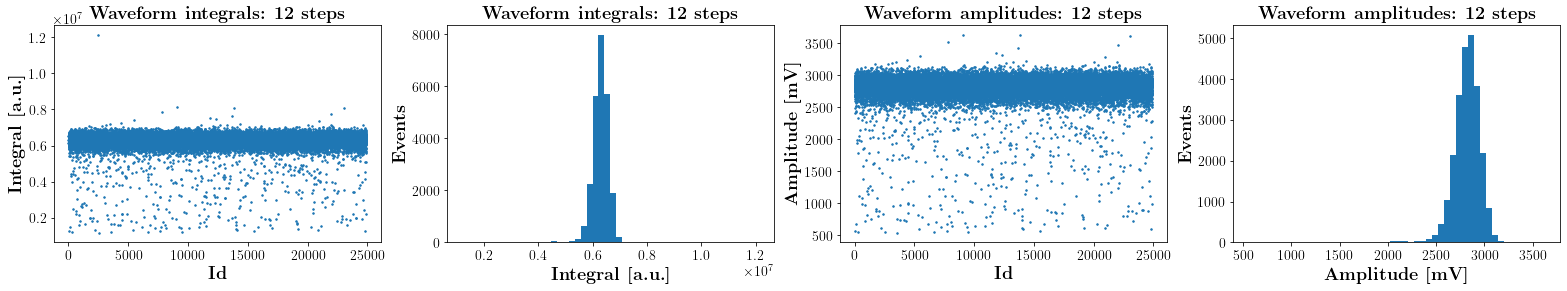

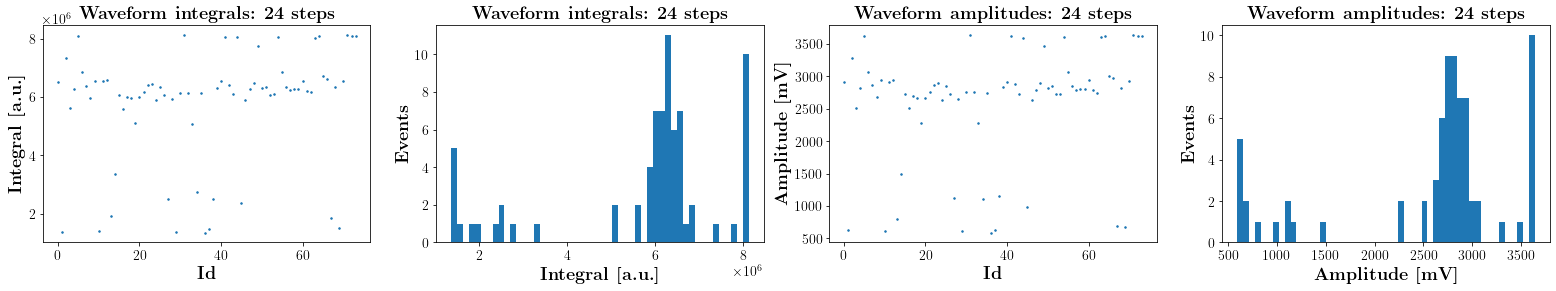

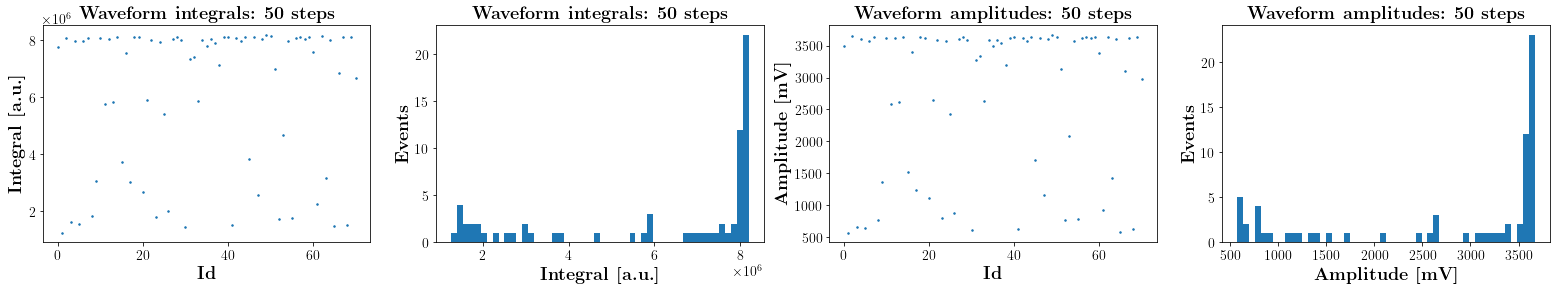

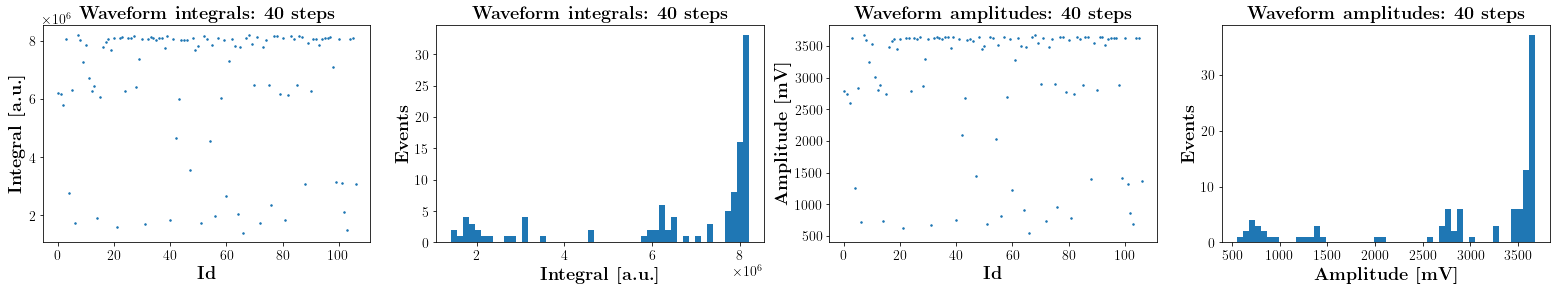

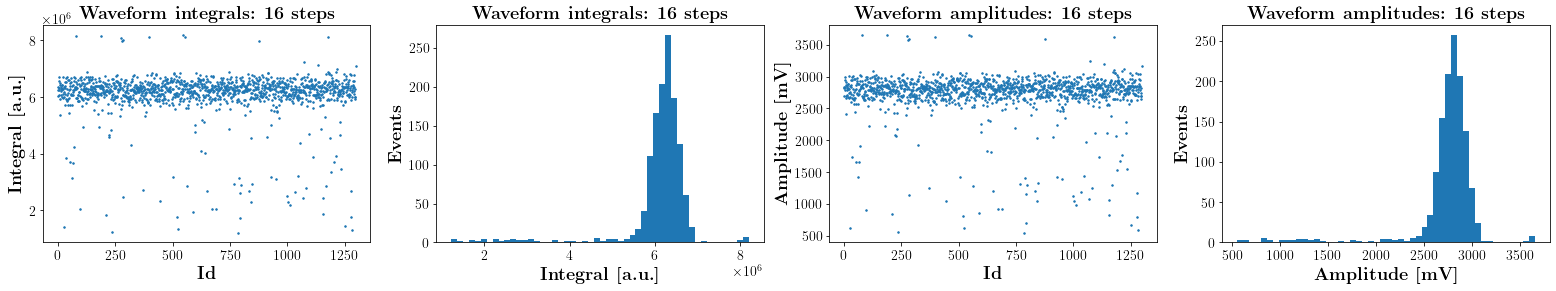

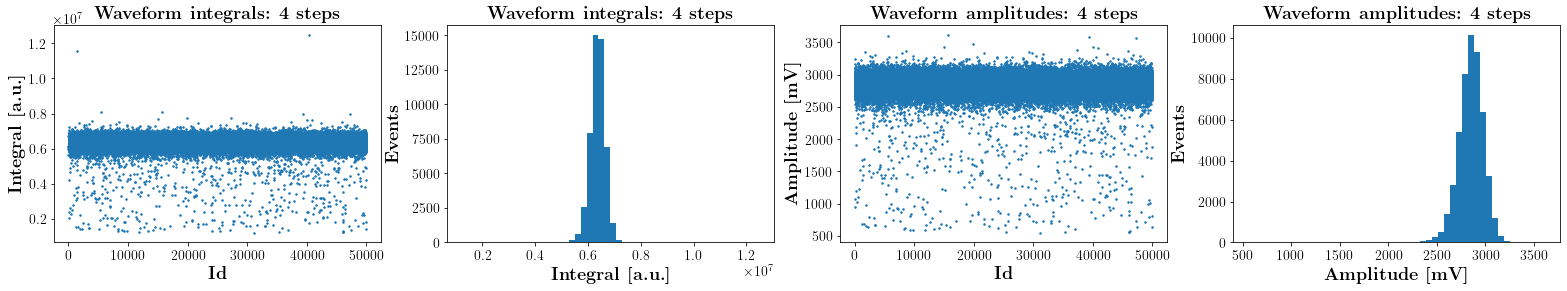

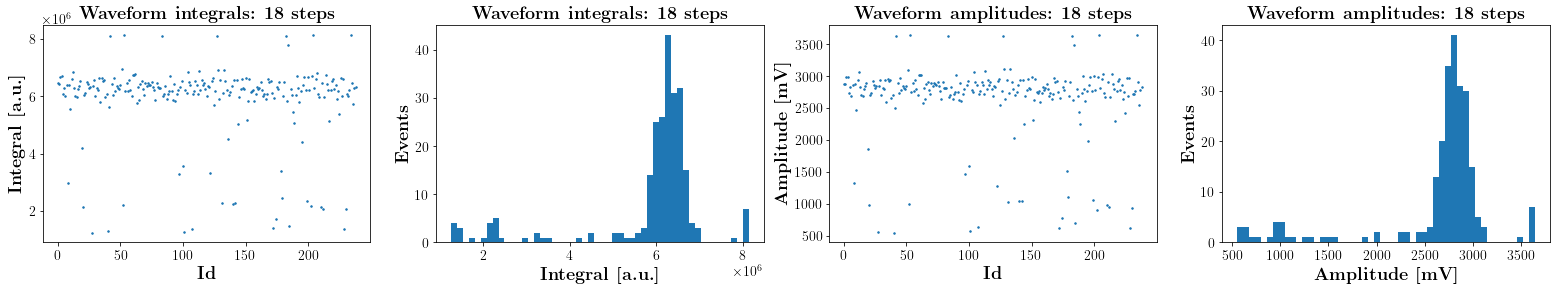

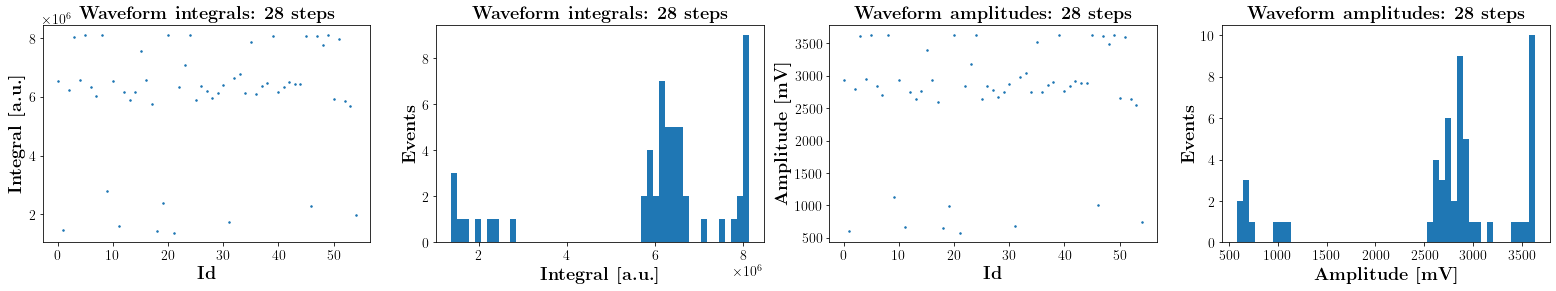

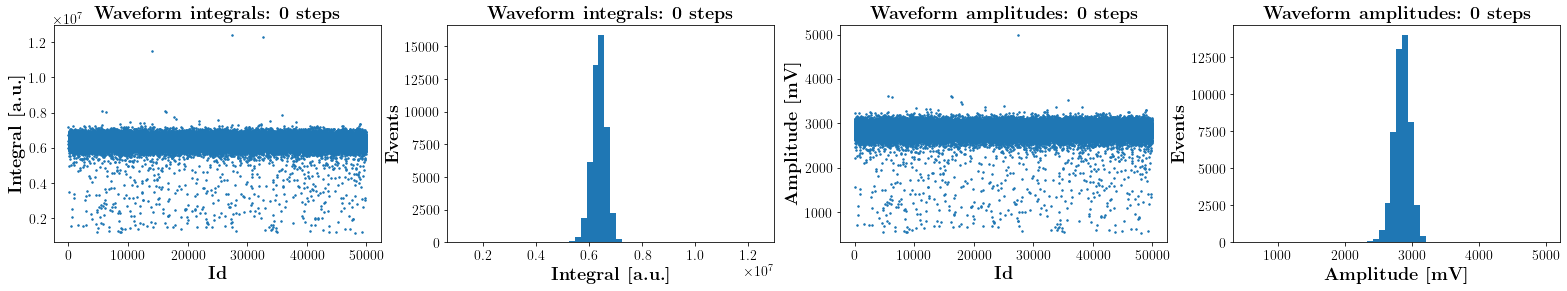

In [63]:
angles = []
events = []
err_angles = []
err_events = []

pico_step = []
pico_rad  = []
pico_deg  = []
pico_seg  = []
pico_ev   = []
pico_t    = []
pico_r    = []

pico_step_err = []
pico_rad_err  = []
pico_deg_err  = []
pico_ev_err   = []
pico_r_err    = []



os.chdir(DATA_PATH)
for d in os.listdir("."):
    # print(d)
    os.chdir(d)
    run = d.split("_")[0]
    
    #######################################################################
    # TAKE DIRECTION FROM DIR NAME
    #######################################################################
    if "DC" in d:
        sign = -1
    elif "SC" in d:
        sign = +1
    else:
        sign = 0
    #######################################################################

    #######################################################################
    # TAKE DATA FROM run FILE
    #######################################################################
    file = open("run")
    line = file.readlines()
    for l in line:
        if (l.startswith("n_segments")):
            n_seg = int(l.split('=')[1].strip())
            pico_seg.append(n_seg)
        if (l.startswith("run_time")):
            run_time = int(l.split('=')[1].strip())
    file.close()
    
    steps = sign * int(''.join(filter(lambda i: i.isdigit(), run))) - SC
    #######################################################################
    
    #######################################################################
    # TAKE DATA FROM run_BlockTimes.txt
    #######################################################################
    times  = np.loadtxt("run_BlockTimes.txt")
    blocks = times.shape[0]
    events = blocks * n_seg
    # print(times.shape)
    if times.shape != (2,):
        t  = times[-1,1] - times[0,0] - np.sum(times[1:,0]-times[:-1,1])
    else:
        t  = run_time
    #######################################################################

    
    #######################################################################
    # TAKE DATA FROM ALL WAVEFORMS
    #######################################################################
    if WAVE2NUMPY:
        # load data and smooth filter with MAV
        data     = np.load(d+".npy")
        data_mav = np.apply_along_axis(moving_average, 1, data, M)

        # compute baseline mask
        baseline_mask = np.arange(data_mav.shape[1])
        baseline_mask = ((baseline_mask<1000) | (baseline_mask>3000))

        # compute baseline and amplitude
        baseline   = np.sum(data_mav[:,baseline_mask], axis=1) / data_mav[:,baseline_mask].shape[1]
        peaks      = np.max(data_mav, axis=1)
        amplitudes = (peaks - baseline) * 10 / 65536 * 1000
        
        # filter events by waveform amplitude
        events = amplitudes[(amplitudes>=MIN_MV) & (amplitudes<=MAX_MV)].shape[0]

        # compute integral
        data_mav_int = np.sum(data_mav, axis=1) - baseline*data_mav.shape[1]

        # compute integral mean and variance
        data_mav_int_mean = np.mean(data_mav_int)
        data_mav_int_var  = np.std(data_mav_int)

        # not so useful (it will be removed)
        if REJECT_3SIGMA:
            mask_t = np.logical_and(data_mav_int<data_mav_int_mean+data_mav_int_var*3, data_mav_int>data_mav_int_mean-data_mav_int_var*3)
            mask_f = np.logical_not(mask_t)
        else:
            mask_t = np.ones(data_mav_int.shape, dtype=bool)
            mask_f = np.logical_not(mask_t)

        if PLOT_WAVE:
            fig=plt.figure(figsize=(6*4+3, 4))
            plt.subplot(1,4,1)
            if mask_f.shape[0] != 0:
                plt.plot(np.where(mask_t)[0], data_mav_int[mask_t], "o", markersize=1.5)
                plt.plot(np.where(mask_f)[0], data_mav_int[mask_f], "o", markersize=1.5)
            else:
                plt.plot(np.where(mask_t)[0], data_mav_int[mask_t], "o", markersize=1.5)
            plt.xlabel(r"\bf{Id}")
            plt.ylabel(r"\bf{Integral [a.u.]}")
            plt.title(r"\bf{Waveform integrals: " + str(steps) + " steps}")

            plt.subplot(1,4,2)
            if mask_f.shape[0] != 0:
                plt.hist([data_mav_int[mask_t], data_mav_int[mask_f]], bins=50, stacked=True)
            else:
                plt.hist(data_mav_int[mask_t], bins=50, stacked=True)
            # plt.yscale("log")
            plt.xlabel(r"\bf{Integral [a.u.]}")
            plt.ylabel(r"\bf{Events}")
            plt.title(r"\bf{Waveform integrals: " + str(steps) + " steps}")
            
            plt.subplot(1,4,3)
            plt.plot(np.arange(0,amplitudes.shape[0]), amplitudes, "o", markersize=1.5)
            plt.xlabel(r"\bf{Id}")
            plt.ylabel(r"\bf{Amplitude [mV]}")
            plt.title(r"\bf{Waveform amplitudes: " + str(steps) + " steps}")
            
            plt.subplot(1,4,4)
            plt.hist(amplitudes, bins=50)
            # plt.yscale("log")
            plt.xlabel(r"\bf{Amplitude [mV]}")
            plt.ylabel(r"\bf{Events}")
            plt.title(r"\bf{Waveform amplitudes: " + str(steps) + " steps}")
            plt.show()
    #######################################################################
    
    
    #######################################################################
    # COMPUTE RELEVANT QUANTITIES
    #######################################################################
    pico_step.append(steps)
    pico_rad.append(steps * 0.9 * np.pi / 180.0)
    pico_deg.append(steps * 0.9)
    pico_t.append(t)
    pico_ev.append(events)
    pico_r.append(events / t * 3600)
    #######################################################################
    
    #######################################################################
    # COMPUTE ERRORS
    #######################################################################
    pico_step_err.append(0.05) # 1.0 / np.sqrt(12.0)
    pico_rad_err .append(0.05 * 0.9 * np.pi / 180.0)
    pico_deg_err .append(0.05 * 0.9)
    pico_ev_err  .append(np.sqrt(events))
    pico_r_err   .append(np.sqrt(events) / t * 3600)
    #######################################################################

    os.chdir(DATA_PATH)

### Events distribution

In [70]:
col = palette.brewer['RdYlGn'][10]

In [71]:
d = {
    "pico_step"     : pico_step,
    "pico_rad"      : pico_rad,
    "pico_deg"      : pico_deg,
    "pico_seg"      : pico_seg,
    "pico_ev"       : pico_ev,
    "pico_t"        : pico_t,
    "pico_r"        : pico_r,
    "pico_step_err" : pico_step_err,
    "pico_rad_err"  : pico_rad_err,
    "pico_deg_err"  : pico_deg_err,
    "pico_ev_err"   : pico_ev_err,
    "pico_r_err"    : pico_r_err
}

df = pd.DataFrame(data=d)
df = df.sort_values(by=['pico_step'])

In [72]:
df = df.groupby(["pico_step", "pico_rad", "pico_deg", "pico_seg", "pico_step_err", "pico_rad_err", "pico_deg_err"], as_index=False).sum()

df["pico_r"]      = df["pico_ev"] / df["pico_t"] * 3600
df["pico_ev_err"] = np.sqrt(df["pico_ev"])
df["pico_r_err"]  = df["pico_ev_err"] / df["pico_t"] * 3600

In [73]:
df

,pico_step,pico_rad,pico_deg,pico_seg,pico_step_err,pico_rad_err,pico_deg_err,pico_ev,pico_t,pico_r,pico_ev_err,pico_r_err
0,-50,-0.785398,-45.0,1,0.05,0.000785,0.045,28,130222.830000,0.774058,5.291503,0.146283
1,-40,-0.628319,-36.0,1,0.05,0.000785,0.045,51,86573.670001,2.120737,7.141428,0.296963
2,-35,-0.549779,-31.5,1,0.05,0.000785,0.045,20,43215.730000,1.666060,4.472136,0.372542
3,-30,-0.471239,-27.0,1,0.05,0.000785,0.045,23,19038.040000,4.349187,4.795832,0.906868
4,-28,-0.439823,-25.2,1,0.05,0.000785,0.045,35,19076.900000,6.604847,5.916080,1.116423
5,-26,-0.408407,-23.4,1,0.05,0.000785,0.045,56,18020.560001,11.187222,7.483315,1.494955
6,-24,-0.376991,-21.6,1,0.05,0.000785,0.045,39,10878.630000,12.906037,6.244998,2.066620
7,-22,-0.345575,-19.8,1,0.05,0.000785,0.045,76,10874.529999,25.159708,8.717798,2.886016
8,-20,-0.314159,-18.0,10,0.05,0.000785,0.045,80,7485.610000,38.473818,8.944272,4.301504
9,-18,-0.282743,-16.2,10,0.05,0.000785,0.045,205,7208.770000,102.375301,14.317821,7.150201


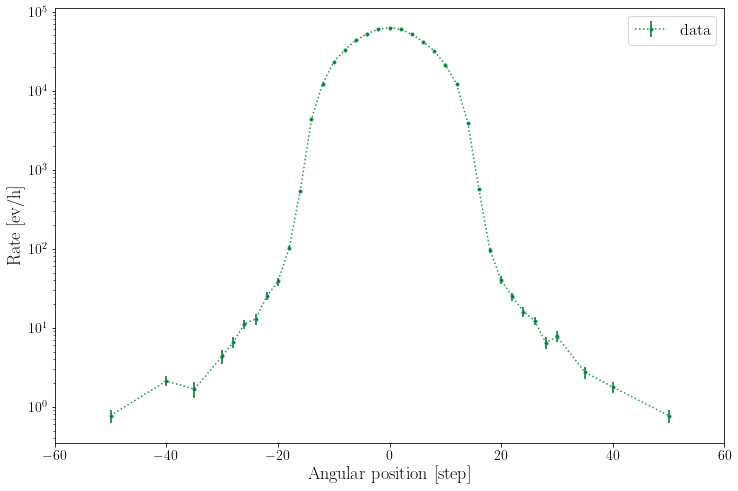

In [74]:
plt.figure(figsize=(12,8))
plt.yscale("log")
plt.errorbar(df["pico_step"],
             df["pico_r"],
             #xerr=df["pico_step_err"],
             yerr=df["pico_r_err"],
             fmt=':o',
             markerfacecolor=col[0],
             color=col[1],
             ecolor=col[0],
             label="data",
             alpha=1,
             markersize=3) #fillstyle="none"
plt.xlabel("Angular position [step]")
plt.ylabel("Rate [ev/h]")
plt.xlim(-60,60)
plt.legend()
plt.show()

## Save data

In [75]:
if SAVE_DATA:
    df.to_csv(SAVE_PATH + "pico_data_tin.csv", index=False)